# <center>Surprise Housing Assignment</center>

### <center>Advanced Regression using <i>Ridge</i> and <i>Lasso</i> Regularization</center>

<hr style='height:2px; width:20%'>

## <a id='content' style="color:black; text-decoration:none;">Content:<a>

1. [Importing and Analysing Data](#InAd)
2. [Visualizing Data](#vizData)
3. Cleaning Data<br>
    a) [Handlin Missing and Zero Values](#hMZv)<br>
    b) [Creating New Columns](#newCol)<br>
    c) [Removing Outliers](#remOut)<br>
    d) [Post cleaning Visualization](#posClVs)
4. [Preparing Data](#prepData)
5. [Modelling](#model)<br>
    a) [Linear Reg](#lrmodel)<br>
    b) [Ridge Reg](#rgmodel)<br>
    c) [Lasso Reg](#lsmodel)<br>
6. [Metric Analysis](#metric)
7. [Model Chosen](#modlChoice)
8. [Final Fit](#finFit)<br>
 [Questions...](#ques)<br>
 [Data Dictionary](#dataDict)

<hr style="height:1px">

#### Importing basic Libs

In [477]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from pandas.api.types import is_numeric_dtype, is_string_dtype
import warnings
warnings.filterwarnings('ignore')

## 1. <a id='InAd' style="color:black; text-decoration:none;">Importing and analysing data<a>

In [478]:
#Importing dataset
sales = pd.read_csv('train.csv', index_col='Id')

In [479]:
#Reading Data
sales.head(10)

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
Id,,,,,,,,,,,,,,,,,,,,,
1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000
6,50,RL,85.0,14115,Pave,NaN,IR1,Lvl,AllPub,Inside,...,0,NaN,MnPrv,Shed,700,10,2009,WD,Normal,143000
7,20,RL,75.0,10084,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,8,2007,WD,Normal,307000
8,60,RL,NaN,10382,Pave,NaN,IR1,Lvl,AllPub,Corner,...,0,NaN,NaN,Shed,350,11,2009,WD,Normal,200000
9,50,RM,51.0,6120,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,4,2008,WD,Abnorml,129900


In [480]:
#Columns
sales.columns

Index(['MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street', 'Alley',
       'LotShape', 'LandContour', 'Utilities', 'LotConfig', 'LandSlope',
       'Neighborhood', 'Condition1', 'Condition2', 'BldgType', 'HouseStyle',
       'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd', 'RoofStyle',
       'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType', 'MasVnrArea',
       'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual', 'BsmtCond',
       'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1', 'BsmtFinType2',
       'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating', 'HeatingQC',
       'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF',
       'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath',
       'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual', 'TotRmsAbvGrd',
       'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType', 'GarageYrBlt',
       'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual', 'GarageCond',
       'PavedDrive', 'Wo

In [481]:
#Mathematical Data Description
sales.describe()

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1460.000000,1201.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1452.000000,1460.000000,1460.000000,...,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,56.897260,70.049958,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.685262,443.639726,46.549315,...,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,180921.195890
std,42.300571,24.284752,9981.264932,1.382997,1.112799,30.202904,20.645407,181.066207,456.098091,161.319273,...,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,79442.502883
min,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,20.000000,59.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129975.000000
50%,50.000000,69.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,0.000000,...,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,70.000000,80.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,166.000000,712.250000,0.000000,...,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,1474.000000,...,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000


In [482]:
#Data Information
sales.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1460 entries, 1 to 1460
Data columns (total 80 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   MSSubClass     1460 non-null   int64  
 1   MSZoning       1460 non-null   object 
 2   LotFrontage    1201 non-null   float64
 3   LotArea        1460 non-null   int64  
 4   Street         1460 non-null   object 
 5   Alley          91 non-null     object 
 6   LotShape       1460 non-null   object 
 7   LandContour    1460 non-null   object 
 8   Utilities      1460 non-null   object 
 9   LotConfig      1460 non-null   object 
 10  LandSlope      1460 non-null   object 
 11  Neighborhood   1460 non-null   object 
 12  Condition1     1460 non-null   object 
 13  Condition2     1460 non-null   object 
 14  BldgType       1460 non-null   object 
 15  HouseStyle     1460 non-null   object 
 16  OverallQual    1460 non-null   int64  
 17  OverallCond    1460 non-null   int64  
 18  YearBuil

In [483]:
#Dataframe Shape
sales.shape

(1460, 80)

In [484]:
#Converting some numerical columns to categorical after going through Data Dictionary

#Conveting Month & Year Sold column to Object
sales['MoSold'] = sales['MoSold'].astype('object')
sales['YrSold'] = sales['YrSold'].astype('object')

#Converting 3 columns ('MSSubClass', 'OverallQual', 'OverallCond') to categorical columns as there are different levels
sales['MSSubClass'] = sales['MSSubClass'].astype(object)
sales['OverallQual'] = sales['OverallQual'].astype(object)
sales['OverallCond'] = sales['OverallCond'].astype(object)

#Converting KitchenAbvGr as it has only 3  levels
sales['KitchenAbvGr'] = sales['KitchenAbvGr'].astype(object)

#Converting Garage Cars to Object type as it only has 4 levels
sales['GarageCars'] = sales['GarageCars'].astype(object)

#Converting FullBath to object as it has 4 Levels
sales['FullBath'] = sales['FullBath'].astype(object)

[Data Dictionary](#dataDict)

In [485]:
sales.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1460 entries, 1 to 1460
Data columns (total 80 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   MSSubClass     1460 non-null   object 
 1   MSZoning       1460 non-null   object 
 2   LotFrontage    1201 non-null   float64
 3   LotArea        1460 non-null   int64  
 4   Street         1460 non-null   object 
 5   Alley          91 non-null     object 
 6   LotShape       1460 non-null   object 
 7   LandContour    1460 non-null   object 
 8   Utilities      1460 non-null   object 
 9   LotConfig      1460 non-null   object 
 10  LandSlope      1460 non-null   object 
 11  Neighborhood   1460 non-null   object 
 12  Condition1     1460 non-null   object 
 13  Condition2     1460 non-null   object 
 14  BldgType       1460 non-null   object 
 15  HouseStyle     1460 non-null   object 
 16  OverallQual    1460 non-null   object 
 17  OverallCond    1460 non-null   object 
 18  YearBuil

[Content](#content)

<hr style="height:0.8px">

## 2. <a id='vizData' style="color:black; text-decoration:none;">Visualizing Data<a>

> ### Distribution Plots

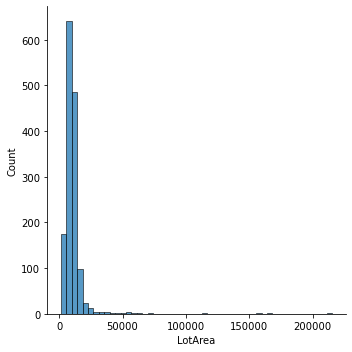

In [486]:
#Lot Area
sns.displot(sales['LotArea'], bins=50);

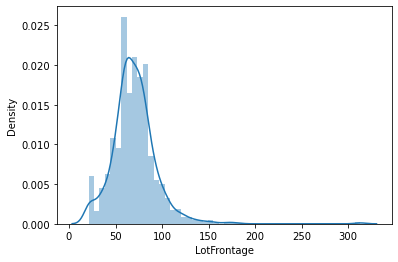

In [487]:
# Lot front
sns.distplot(sales['LotFrontage']);

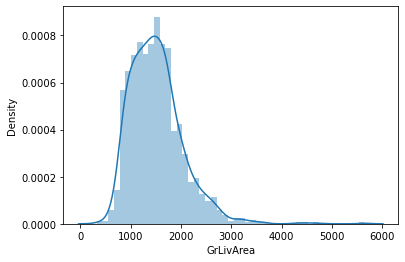

In [488]:
#Bedrooms density
sns.distplot(sales['GrLivArea']);

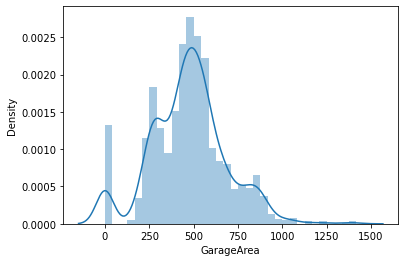

In [489]:
#Garage Area
sns.distplot(sales['GarageArea']);

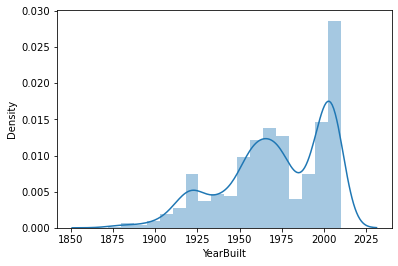

In [490]:
#Density of year in which most houses were built
sns.distplot(sales['YearBuilt']);

> ### Count Plots

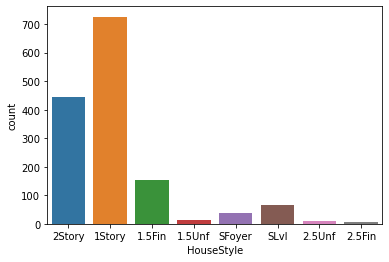

In [491]:
#Style of houses
sns.countplot(sales['HouseStyle']);

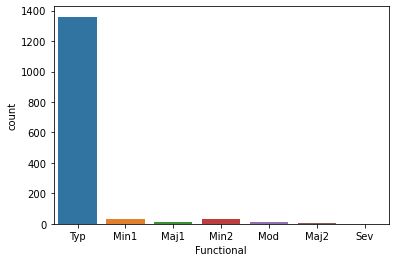

In [492]:
#Home Functionality
sns.countplot(sales['Functional']);

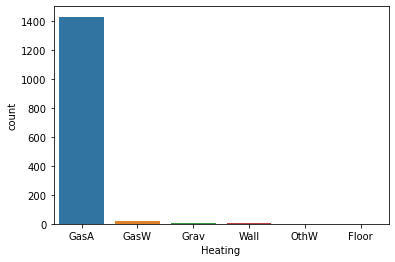

In [493]:
#Heating Types
sns.countplot(sales['Heating']);

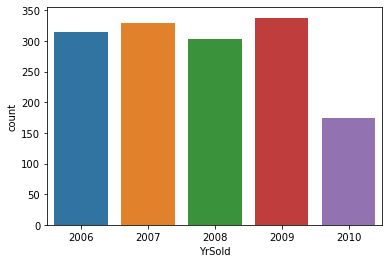

In [494]:
#Count of houses sold in 5 Years
sns.countplot(sales['YrSold']);

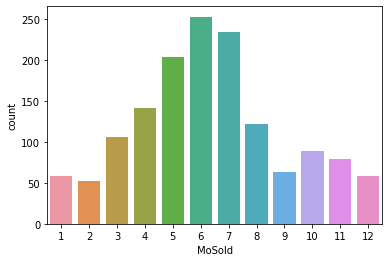

In [495]:
#Distribution of houses sold in Months
sns.countplot(sales['MoSold']);

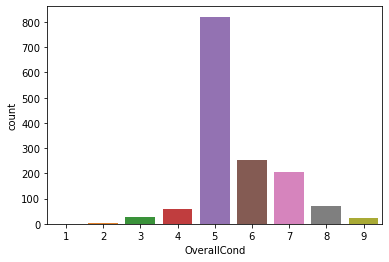

In [496]:
#Over all condition of Houses
sns.countplot(sales['OverallCond']);

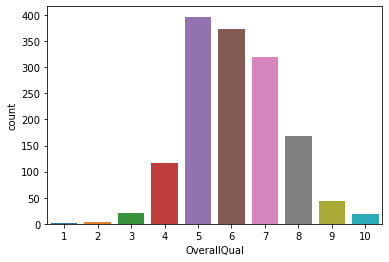

In [497]:
#Overall Quality of houses
sns.countplot(sales['OverallQual']);

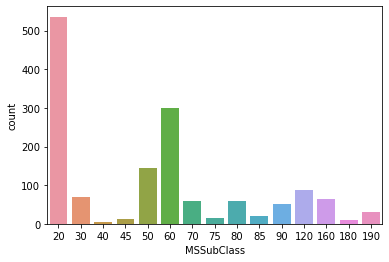

In [498]:
#Dwelling of houses
sns.countplot(sales['MSSubClass']);

> ### Heatmap

In [499]:
#Correlation Matrix
cor = sales.corr()
cor

,LotFrontage,LotArea,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,...,GarageYrBlt,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,SalePrice
LotFrontage,1.000000,0.426095,0.123349,0.088866,0.193458,0.233633,0.049900,0.132644,0.392075,0.457181,...,0.070250,0.344997,0.088521,0.151972,0.010700,0.070029,0.041383,0.206167,0.003368,0.351799
LotArea,0.426095,1.000000,0.014228,0.013788,0.104160,0.214103,0.111170,-0.002618,0.260833,0.299475,...,-0.024947,0.180403,0.171698,0.084774,-0.018340,0.020423,0.043160,0.077672,0.038068,0.263843
YearBuilt,0.123349,0.014228,1.000000,0.592855,0.315707,0.249503,-0.049107,0.149040,0.391452,0.281986,...,0.825667,0.478954,0.224880,0.188686,-0.387268,0.031355,-0.050364,0.004950,-0.034383,0.522897
YearRemodAdd,0.088866,0.013788,0.592855,1.000000,0.179618,0.128451,-0.067759,0.181133,0.291066,0.240379,...,0.642277,0.371600,0.205726,0.226298,-0.193919,0.045286,-0.038740,0.005829,-0.010286,0.507101
MasVnrArea,0.193458,0.104160,0.315707,0.179618,1.000000,0.264736,-0.072319,0.114442,0.363936,0.344501,...,0.252691,0.373066,0.159718,0.125703,-0.110204,0.018796,0.061466,0.011723,-0.029815,0.477493
BsmtFinSF1,0.233633,0.214103,0.249503,0.128451,0.264736,1.000000,-0.050117,-0.495251,0.522396,0.445863,...,0.153484,0.296970,0.204306,0.111761,-0.102303,0.026451,0.062021,0.140491,0.003571,0.386420
BsmtFinSF2,0.049900,0.111170,-0.049107,-0.067759,-0.072319,-0.050117,1.000000,-0.209294,0.104810,0.097117,...,-0.088011,-0.018227,0.067898,0.003093,0.036543,-0.029993,0.088871,0.041709,0.004940,-0.011378
BsmtUnfSF,0.132644,-0.002618,0.149040,0.181133,0.114442,-0.495251,-0.209294,1.000000,0.415360,0.317987,...,0.190708,0.183303,-0.005316,0.129005,-0.002538,0.020764,-0.012579,-0.035092,-0.023837,0.214479
TotalBsmtSF,0.392075,0.260833,0.391452,0.291066,0.363936,0.522396,0.104810,0.415360,1.000000,0.819530,...,0.322445,0.486665,0.232019,0.247264,-0.095478,0.037384,0.084489,0.126053,-0.018479,0.613581
1stFlrSF,0.457181,0.299475,0.281986,0.240379,0.344501,0.445863,0.097117,0.317987,0.819530,1.000000,...,0.233449,0.489782,0.235459,0.211671,-0.065292,0.056104,0.088758,0.131525,-0.021096,0.605852


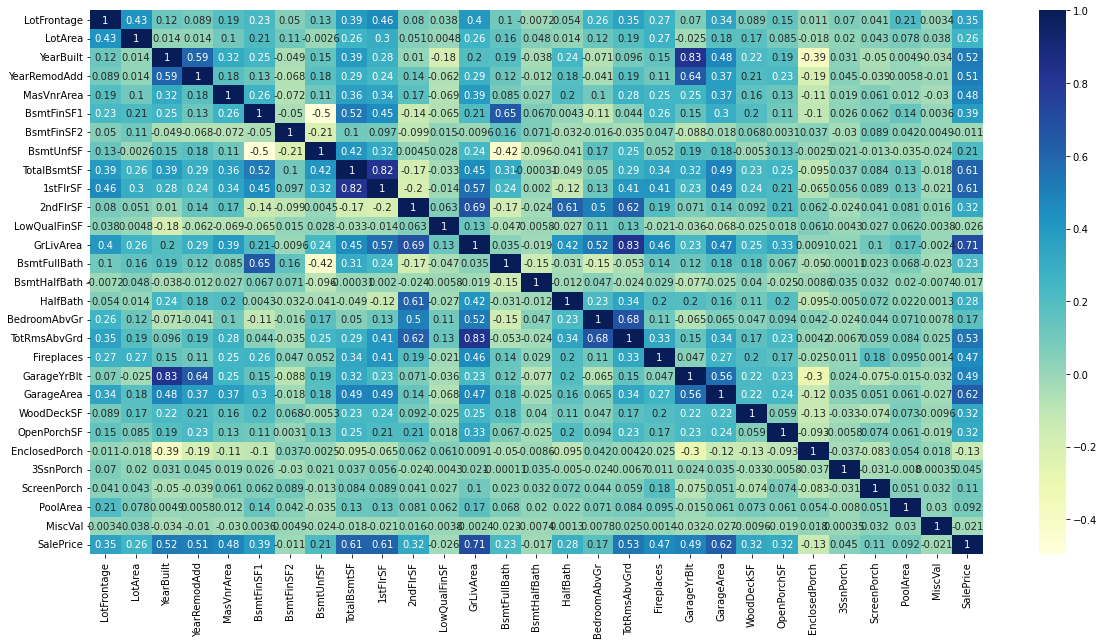

In [500]:
#Plotting Correlation
 
# Figure Size
plt.figure(figsize=(20,10))

# Heatmap
sns.heatmap(cor, cmap='YlGnBu', annot=True)
plt.show()

<b>I will create heatmap once again after filling null vlaues and cleaning data</b>

[Content](#content)

<hr style="height:0.8px">

## 3. <a id='clData' style="color:black; text-decoration:none;">Cleaning Data<a>

> ### a) <a id='hMZv' style="color:black; text-decoration:none;">Handling Missing and Zero values<a>

In [501]:
#Creating a list to add columns to be dropped and to be filled/imputed

col_drop = []  #columns to be dropped
col_fill = []  #columns to be imputed


> * #### Null Values

In [502]:
# Add columns having more than 600 null values to drop list and rest ghaving few null values to fill list
# Columns added to drop list will be marked with Aestrik *

for i in sales.columns:
    c = sales[i].isna().sum()
    if c > 600:
        col_drop.append(i)
        print(f'*{i} : {c}')
    elif 0 < c <600:
        print(f'{i} : {c}')

LotFrontage : 259
*Alley : 1369
MasVnrType : 8
MasVnrArea : 8
BsmtQual : 37
BsmtCond : 37
BsmtExposure : 38
BsmtFinType1 : 37
BsmtFinType2 : 38
Electrical : 1
*FireplaceQu : 690
GarageType : 81
GarageYrBlt : 81
GarageFinish : 81
GarageQual : 81
GarageCond : 81
*PoolQC : 1453
*Fence : 1179
*MiscFeature : 1406


> * #### Zero Values

In [503]:
#Add columns having more than 600 zeros to drop list
#As they will not play important role having more than 50% values as zero
# Columns added to drop list will be marked with Aestrik *

print(f'Total : {sales.shape[0]}\n')

for i in sales.columns:
    if is_numeric_dtype(sales[i]) == True:
        c = (sales[i] == 0).sum()
        if c > 600:
            col_drop.append(i)
            print(f'*{i} : {c}')
        elif 0 < c < 600:
            print(f'{i} : {c}')

Total : 1460

*MasVnrArea : 861
BsmtFinSF1 : 467
*BsmtFinSF2 : 1293
BsmtUnfSF : 118
TotalBsmtSF : 37
*2ndFlrSF : 829
*LowQualFinSF : 1434
*BsmtFullBath : 856
*BsmtHalfBath : 1378
*HalfBath : 913
BedroomAbvGr : 6
*Fireplaces : 690
GarageArea : 81
*WoodDeckSF : 761
*OpenPorchSF : 656
*EnclosedPorch : 1252
*3SsnPorch : 1436
*ScreenPorch : 1344
*PoolArea : 1453
*MiscVal : 1408


> * #### Max Value Count

   <b> There might be few columns that have a value count weighted 75% on one of the values.<br></b>
Ex: If a column have values w,x,y,z and out of 1500 total values, 'w' has 1100 value counts, than that column will not play a significant role.
   <b> Thus, lets find those columns and add them to drop list </b>

In [504]:
#Remove columns having 70% weight on one value

for i in sales.columns:
    if is_string_dtype(sales[i]) == True:
        if max(sales[i].value_counts()) > 1000:   # add to drop list if maximum value count is more than 1000
            col_drop.append(i)
            print(f'{i} : \n{sales[i].value_counts()}\n')

MSZoning : 
RL         1151
RM          218
FV           65
RH           16
C (all)      10
Name: MSZoning, dtype: int64

Street : 
Pave    1454
Grvl       6
Name: Street, dtype: int64

LandContour : 
Lvl    1311
Bnk      63
HLS      50
Low      36
Name: LandContour, dtype: int64

Utilities : 
AllPub    1459
NoSeWa       1
Name: Utilities, dtype: int64

LotConfig : 
Inside     1052
Corner      263
CulDSac      94
FR2          47
FR3           4
Name: LotConfig, dtype: int64

LandSlope : 
Gtl    1382
Mod      65
Sev      13
Name: LandSlope, dtype: int64

Condition1 : 
Norm      1260
Feedr       81
Artery      48
RRAn        26
PosN        19
RRAe        11
PosA         8
RRNn         5
RRNe         2
Name: Condition1, dtype: int64

Condition2 : 
Norm      1445
Feedr        6
Artery       2
RRNn         2
PosN         2
PosA         1
RRAn         1
RRAe         1
Name: Condition2, dtype: int64

BldgType : 
1Fam      1220
TwnhsE     114
Duplex      52
Twnhs       43
2fmCon      31
Name: 

> #### Drop Columns

In [505]:
#Dropping columns from drop list

sales_cp = sales #Copy of original data

sales = sales.drop(col_drop, axis=1)
sales

,MSSubClass,LotFrontage,LotArea,LotShape,Neighborhood,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,...,KitchenQual,TotRmsAbvGrd,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,MoSold,YrSold,SalePrice
Id,,,,,,,,,,,,,,,,,,,,,
1,60,65.0,8450,Reg,CollgCr,2Story,7,5,2003,2003,...,Gd,8,Attchd,2003.0,RFn,2,548,2,2008,208500
2,20,80.0,9600,Reg,Veenker,1Story,6,8,1976,1976,...,TA,6,Attchd,1976.0,RFn,2,460,5,2007,181500
3,60,68.0,11250,IR1,CollgCr,2Story,7,5,2001,2002,...,Gd,6,Attchd,2001.0,RFn,2,608,9,2008,223500
4,70,60.0,9550,IR1,Crawfor,2Story,7,5,1915,1970,...,Gd,7,Detchd,1998.0,Unf,3,642,2,2006,140000
5,60,84.0,14260,IR1,NoRidge,2Story,8,5,2000,2000,...,Gd,9,Attchd,2000.0,RFn,3,836,12,2008,250000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1456,60,62.0,7917,Reg,Gilbert,2Story,6,5,1999,2000,...,TA,7,Attchd,1999.0,RFn,2,460,8,2007,175000
1457,20,85.0,13175,Reg,NWAmes,1Story,6,6,1978,1988,...,TA,7,Attchd,1978.0,Unf,2,500,2,2010,210000
1458,70,66.0,9042,Reg,Crawfor,2Story,7,9,1941,2006,...,Gd,9,Attchd,1941.0,RFn,1,252,5,2010,266500


> #### Fill rest columns 

In [506]:
for i in sales.columns:
    na = sales[i].isna().sum()
    if na > 0:
        col_fill.append(i)
        print(f'{i} : {na}')

LotFrontage : 259
MasVnrType : 8
BsmtQual : 37
BsmtExposure : 38
BsmtFinType1 : 37
GarageType : 81
GarageYrBlt : 81
GarageFinish : 81


In [507]:
#Separating numeric and categorical column names to fill separately 

fill_num = []
fill_alp = []
for i in col_fill:
    if is_numeric_dtype(sales[i]) == True:
        fill_num.append(i)
    elif is_string_dtype(sales[i]) == True:
        fill_alp.append(i)
        
fill_num, fill_alp

(['LotFrontage', 'GarageYrBlt'],
 ['MasVnrType',
  'BsmtQual',
  'BsmtExposure',
  'BsmtFinType1',
  'GarageType',
  'GarageFinish'])

In [508]:
#Fill Numeric columns

#LotFrontage - Fill with mean value
lf_mean = sales['LotFrontage'].mean()
sales['LotFrontage'] = sales['LotFrontage'].fillna(lf_mean)

#GarageYrBlt - fill with median value
gyb_median = sales['GarageYrBlt'].median()
sales['GarageYrBlt'] = sales['GarageYrBlt'].fillna(gyb_median)

In [509]:
sales[fill_num].isna().sum()

LotFrontage    0
GarageYrBlt    0
dtype: int64

In [510]:
#Fill categorical columns with mode value

for i in fill_alp:
    sales[i] = sales[i].fillna(sales[i].mode()[0])

In [511]:
sales.isna().sum()

MSSubClass      0
LotFrontage     0
LotArea         0
LotShape        0
Neighborhood    0
HouseStyle      0
OverallQual     0
OverallCond     0
YearBuilt       0
YearRemodAdd    0
Exterior1st     0
Exterior2nd     0
MasVnrType      0
ExterQual       0
Foundation      0
BsmtQual        0
BsmtExposure    0
BsmtFinType1    0
BsmtFinSF1      0
BsmtUnfSF       0
TotalBsmtSF     0
HeatingQC       0
1stFlrSF        0
GrLivArea       0
FullBath        0
BedroomAbvGr    0
KitchenQual     0
TotRmsAbvGrd    0
GarageType      0
GarageYrBlt     0
GarageFinish    0
GarageCars      0
GarageArea      0
MoSold          0
YrSold          0
SalePrice       0
dtype: int64

[Content](#content)

> ### b) <a id='newCol' style="color:black; text-decoration:none;">Creating new columns from existing columns<a>

In [512]:
#Converting 3 year columns to age

import datetime
current_year = datetime.datetime.now().year #Current year (2023)

sales['HouseAge'] = current_year - sales['YearBuilt']
sales['RemodAge'] = current_year - sales['YearRemodAdd']
sales['GarageAge'] = current_year - sales['GarageYrBlt']

#Dropping original Year columns
sales.drop(['YearBuilt', 'YearRemodAdd', 'GarageYrBlt'], axis=1, inplace=True)

#Move SalePrice column to last
sales = sales[[c for c in sales if c not in ['SalePrice']] + ['SalePrice']]

In [513]:
sales[['GarageAge', 'LotFrontage']].head()

,GarageAge,LotFrontage
Id,,
1,20.0,65.0
2,47.0,80.0
3,22.0,68.0
4,25.0,60.0
5,23.0,84.0


In [514]:
#Since GarageAge and Lot Front are float values, converting them to integer
sales['GarageAge'] = sales['GarageAge'].astype('int64')
sales['LotFrontage'] = sales['LotFrontage'].astype('int64')

In [515]:
sales.head()

,MSSubClass,LotFrontage,LotArea,LotShape,Neighborhood,HouseStyle,OverallQual,OverallCond,Exterior1st,Exterior2nd,...,GarageType,GarageFinish,GarageCars,GarageArea,MoSold,YrSold,HouseAge,RemodAge,GarageAge,SalePrice
Id,,,,,,,,,,,,,,,,,,,,,
1,60,65,8450,Reg,CollgCr,2Story,7,5,VinylSd,VinylSd,...,Attchd,RFn,2,548,2,2008,20,20,20,208500
2,20,80,9600,Reg,Veenker,1Story,6,8,MetalSd,MetalSd,...,Attchd,RFn,2,460,5,2007,47,47,47,181500
3,60,68,11250,IR1,CollgCr,2Story,7,5,VinylSd,VinylSd,...,Attchd,RFn,2,608,9,2008,22,21,22,223500
4,70,60,9550,IR1,Crawfor,2Story,7,5,Wd Sdng,Wd Shng,...,Detchd,Unf,3,642,2,2006,108,53,25,140000
5,60,84,14260,IR1,NoRidge,2Story,8,5,VinylSd,VinylSd,...,Attchd,RFn,3,836,12,2008,23,23,23,250000


In [516]:
sales.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1460 entries, 1 to 1460
Data columns (total 36 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   MSSubClass    1460 non-null   object
 1   LotFrontage   1460 non-null   int64 
 2   LotArea       1460 non-null   int64 
 3   LotShape      1460 non-null   object
 4   Neighborhood  1460 non-null   object
 5   HouseStyle    1460 non-null   object
 6   OverallQual   1460 non-null   object
 7   OverallCond   1460 non-null   object
 8   Exterior1st   1460 non-null   object
 9   Exterior2nd   1460 non-null   object
 10  MasVnrType    1460 non-null   object
 11  ExterQual     1460 non-null   object
 12  Foundation    1460 non-null   object
 13  BsmtQual      1460 non-null   object
 14  BsmtExposure  1460 non-null   object
 15  BsmtFinType1  1460 non-null   object
 16  BsmtFinSF1    1460 non-null   int64 
 17  BsmtUnfSF     1460 non-null   int64 
 18  TotalBsmtSF   1460 non-null   int64 
 19  Heatin

In [517]:
sales.shape

(1460, 36)

In [518]:
sales['BedroomAbvGr'].value_counts()

3    804
2    358
4    213
1     50
5     21
6      7
0      6
8      1
Name: BedroomAbvGr, dtype: int64

[Content](#content)

> ### c) <a id='remOut' style="color:black; text-decoration:none;">Removing Outliers<a>

In [519]:
cat_col = list(sales.select_dtypes(include=['object']).columns)
num_col = list(sales.select_dtypes(include=['int64']).columns)

In [520]:
len(num_col), len(cat_col)

(14, 22)

In [521]:
# Numerical Columns distribution plots

# plt.figure(figsize=(20, 30))
# for i in range(0, len(num_col)):
#     plt.subplot(7,2,i+1)
#     sns.distplot(x = sales[num_col[i]])
#     plt.xlabel(num_col[i])

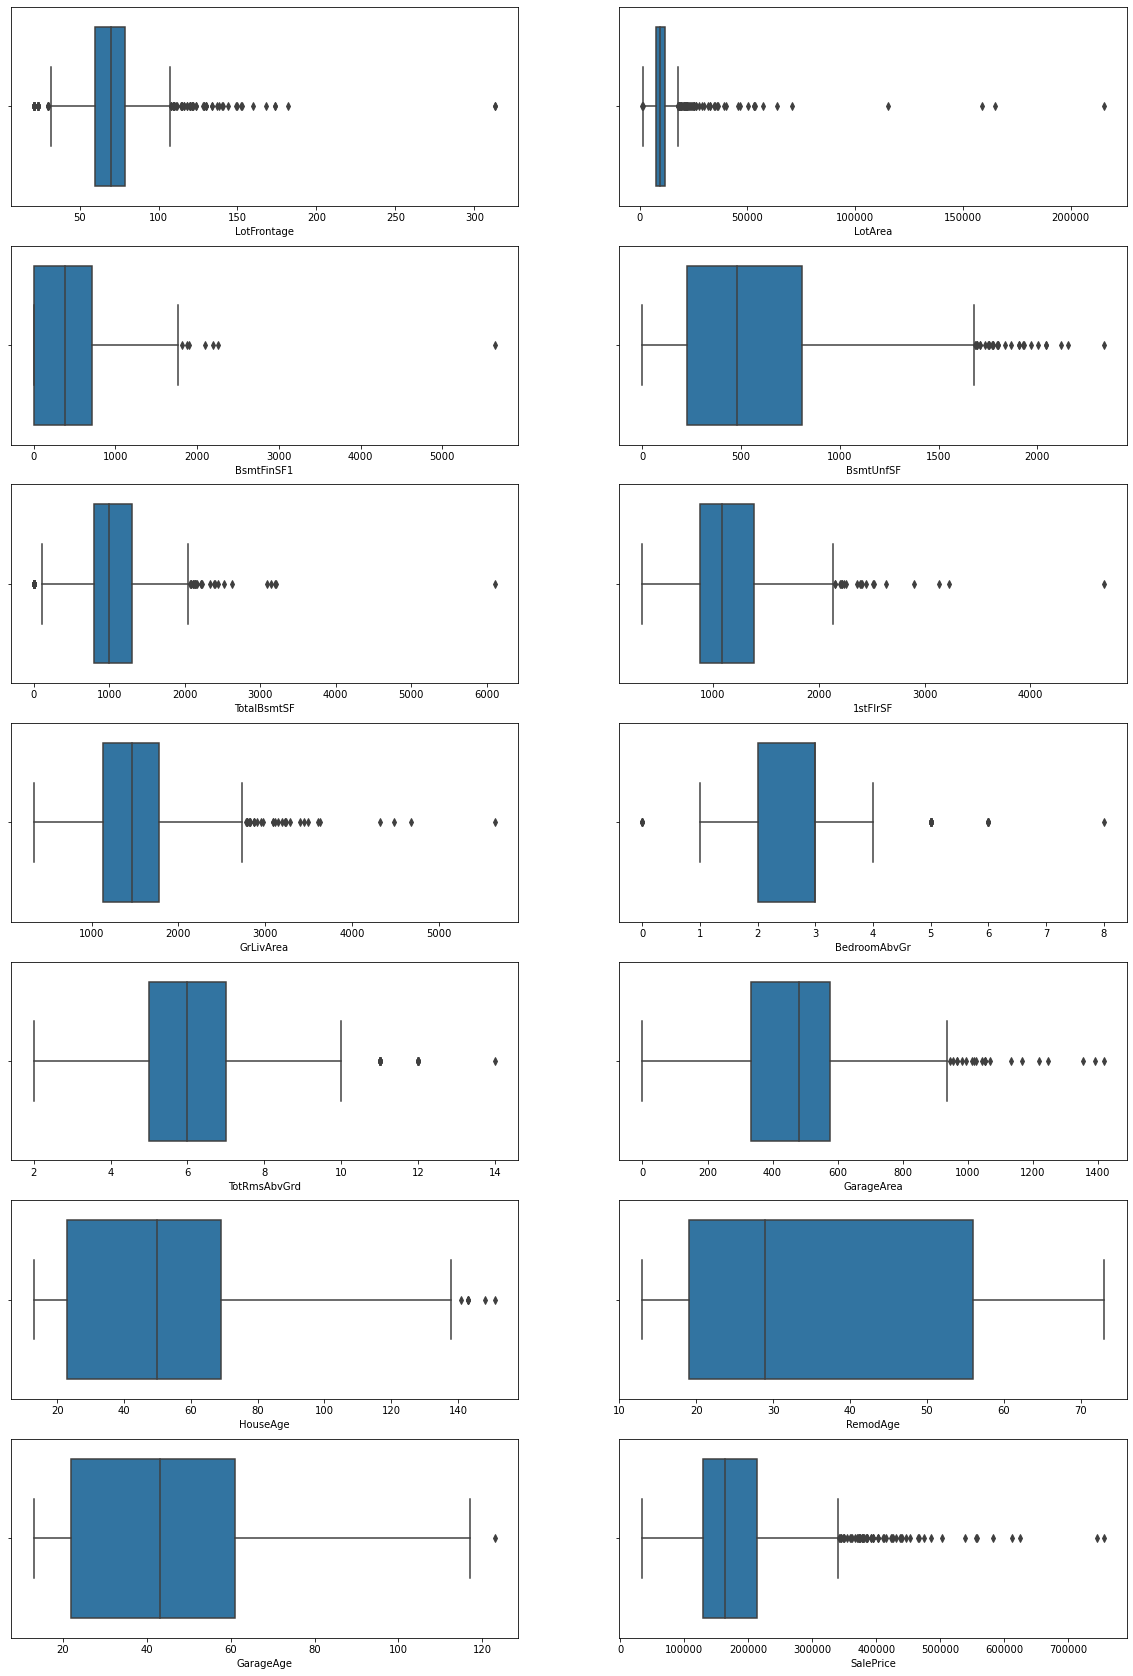

In [522]:
# Boxplot - To visualize extreme outliers

plt.figure(figsize=(20, 30))
for i in range(0, len(num_col)):
    plt.subplot(7,2,i+1)
    sns.boxplot(x =sales[num_col[i]], data = sales)

* As we can see, some columns have very far outliers, lets see how these outliers effect the <b>SalePrice</b> (Target Variable).
* If the Sale Price is also high for the outlier we will <i>drop</i> that row, else we will <i>replace</i> the outlier's value with mean in the next step. 

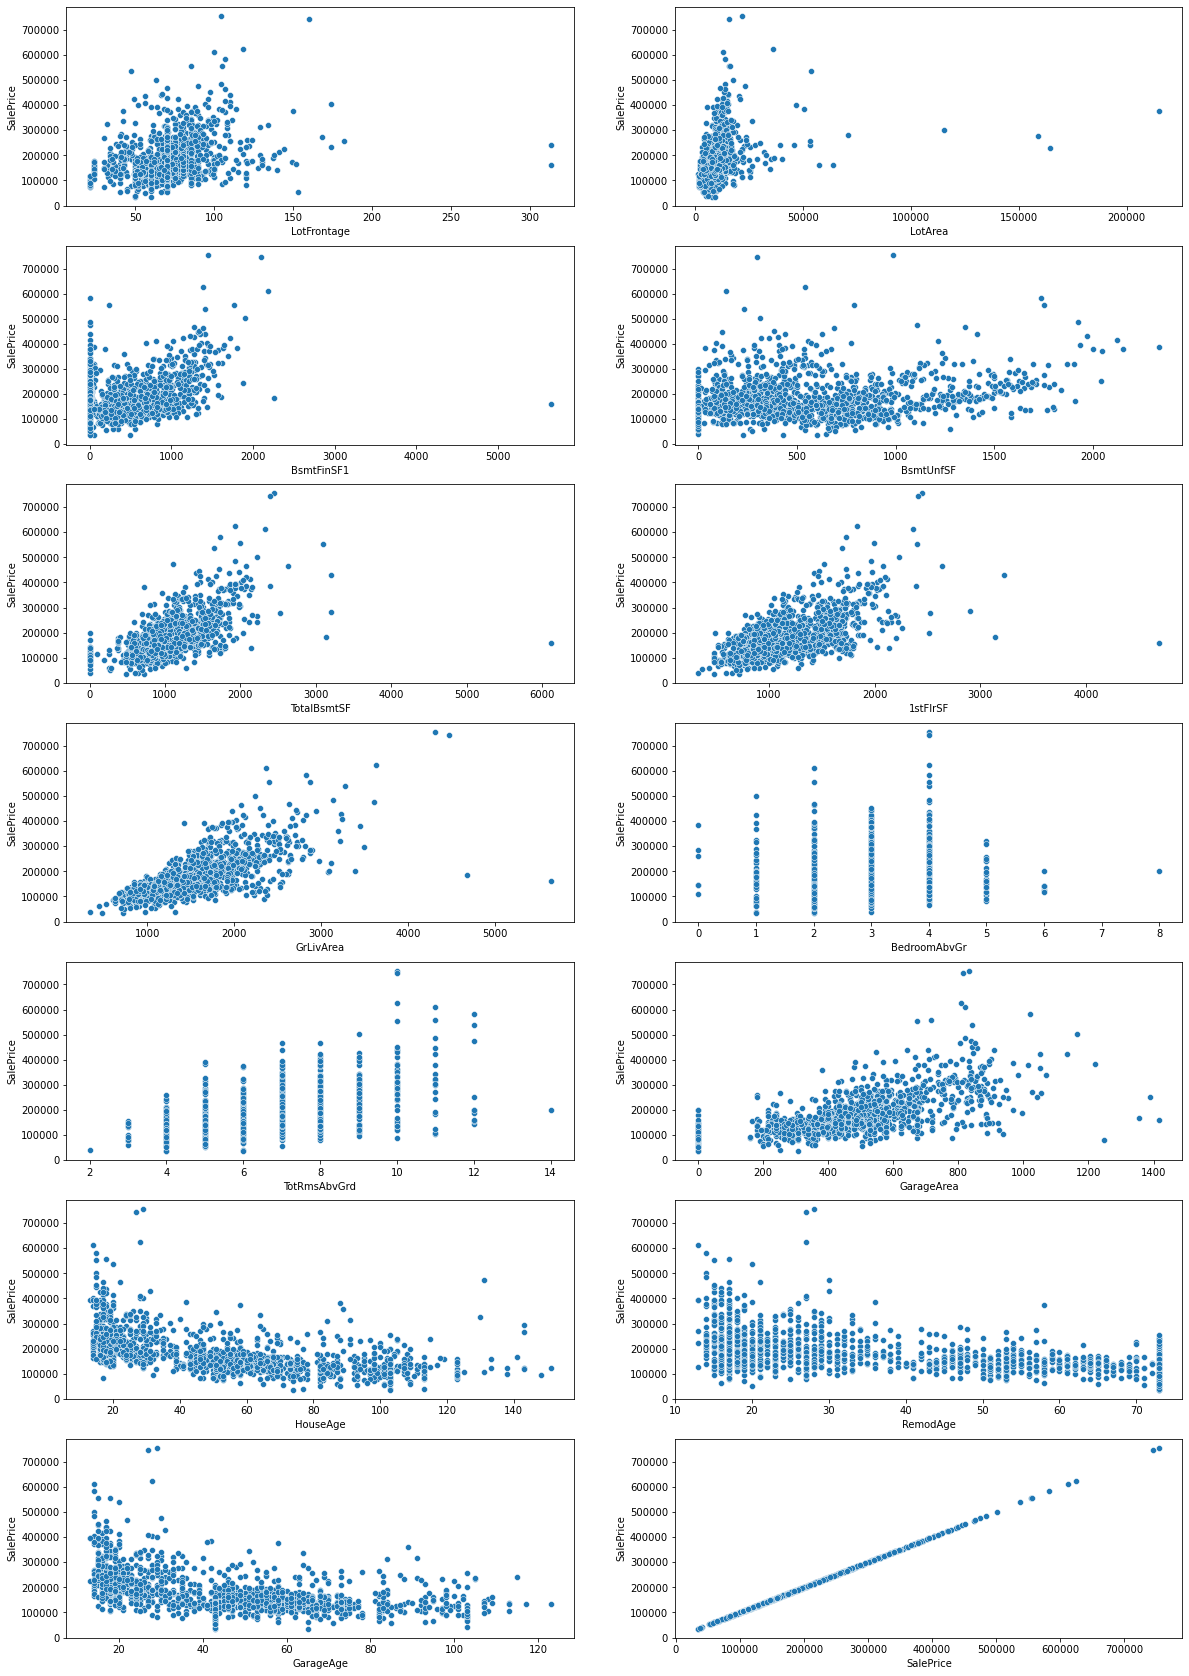

In [523]:
# Scatterplot - To visualize outliers against SalePrice

plt.figure(figsize=(20, 30))
for i in range(0, len(num_col)):
    plt.subplot(7,2,i+1)
    sns.scatterplot(x =sales[num_col[i]], y='SalePrice', data = sales)

Following columns have far outliers that does not effect Sale Price and hence can be replaced by mean:
* LotFrontage
* LotArea
* BsmtFinSF1
* TotalBsmtSF
* 1stFlrSF
* GrLivArea

Only 'GrLivArea' has two outliers that have high SalePrice, thus we will drop these 2 rows.

In [524]:
# Function to get mean value of the column within bounds

def mean_val(col):
    Q1 = sales[col].quantile(0.25)
    Q3 = sales[col].quantile(0.75)
    IQR = Q3 - Q1
    upper_bound = Q3 + 1.5*IQR
    lower_bound = Q1 - 1.5*IQR
    mean_value = np.mean(sales.loc[(sales[col] > lower_bound) & (sales[col] < upper_bound), col])
    return mean_value

In [525]:
#Dataframe Backup before removing outliers
sales_bak = sales

In [526]:
# Remove Maximum outlier from selected columns

outl_col = ['LotFrontage', 'LotArea', 'BsmtFinSF1', 'TotalBsmtSF', '1stFlrSF', 'GrLivArea'] #Selected columns
for col in outl_col:
    mean_value = mean_val(col)  # get mean value from mean_value function
    max_val = sales[col].max()  # get max values of the column, i.e. extreme outliers
    sales.loc[sales[col] == max_val, col] = mean_value    # replace extreme outliers with mean value

Lets drop 2 rows for <b>GrLivArea</b> column outliers

In [527]:
# GrLivArea Outliers
sales.loc[ (sales[col] > 4000) & (sales['SalePrice'] > 740000) , ['GrLivArea', 'SalePrice']]

,GrLivArea,SalePrice
Id,,
692,4316.0,755000
1183,4476.0,745000


<AxesSubplot:xlabel='GrLivArea', ylabel='SalePrice'>

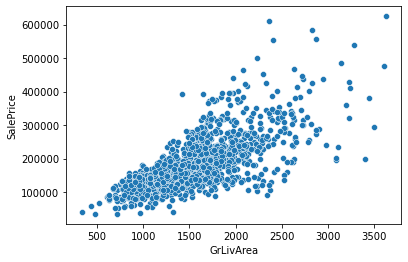

In [528]:
col = 'GrLivArea'
# Drop 2 outliers
sales = sales.drop( sales[(sales[col] > 4000) & (sales['SalePrice'] > 740000)].index )

# Again replace maximum outliers with mean
mean_value = mean_val(col)
max_val = sales[col].max()
sales.loc[sales[col] == max_val, col] = mean_value
sns.scatterplot(x=col, y='SalePrice', data=sales)

<AxesSubplot:xlabel='LotArea', ylabel='SalePrice'>

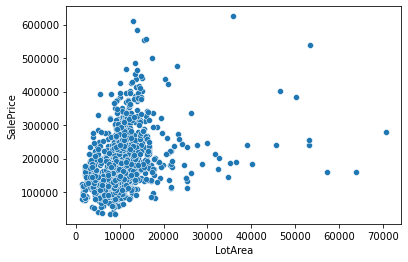

In [529]:
# Remianing outliers for 
col = 'LotArea'
# Again replace maximum outliers with mean
mean_value = mean_val(col)
max_val = sales[col].max()
sales.loc[sales[col] > 100000, col] = mean_value
sns.scatterplot(x=col, y='SalePrice', data=sales)


[Content](#content)

> ### d) <a id='posClVs' style="color:black; text-decoration:none;">Post Cleaning Visualization<a>

In [530]:
#Boxplot of Categorical Features

# plt.figure(figsize=(20, 60))
# for i in range(0,len(cat_col)):
#     plt.subplot(11,2,i+1)
#     sns.boxplot(x = cat_col[i], y = 'SalePrice', data = sales)

In [531]:
sales_num_cols = sales.select_dtypes(include=['int64', 'float64'])
cor = sales_num_cols.corr()
cor

,LotFrontage,LotArea,BsmtFinSF1,BsmtUnfSF,TotalBsmtSF,1stFlrSF,GrLivArea,BedroomAbvGr,TotRmsAbvGrd,GarageArea,HouseAge,RemodAge,GarageAge,SalePrice
LotFrontage,1.000000,0.388235,0.136512,0.145488,0.317834,0.360755,0.313405,0.243115,0.304290,0.312793,-0.119383,-0.070789,-0.062739,0.347514
LotArea,0.388235,1.000000,0.200623,0.038732,0.281618,0.362902,0.335797,0.190684,0.311496,0.298362,-0.040881,-0.036367,0.002610,0.351011
BsmtFinSF1,0.136512,0.200623,1.000000,-0.520792,0.468055,0.395716,0.120564,-0.120668,0.009838,0.270411,-0.249929,-0.124077,-0.143950,0.393670
BsmtUnfSF,0.145488,0.038732,-0.520792,1.000000,0.440126,0.330856,0.251565,0.166604,0.251034,0.183280,-0.149016,-0.181148,-0.185632,0.220701
TotalBsmtSF,0.317834,0.281618,0.468055,0.440126,1.000000,0.804383,0.391189,0.045726,0.264781,0.470847,-0.400098,-0.295931,-0.313699,0.641151
1stFlrSF,0.360755,0.362902,0.395716,0.330856,0.804383,1.000000,0.517611,0.124851,0.394296,0.472767,-0.281216,-0.239840,-0.222323,0.619358
GrLivArea,0.313405,0.335797,0.120564,0.251565,0.391189,0.517611,1.000000,0.540058,0.828229,0.450594,-0.192355,-0.288922,-0.215117,0.720505
BedroomAbvGr,0.243115,0.190684,-0.120668,0.166604,0.045726,0.124851,0.540058,1.000000,0.675558,0.062331,0.072276,0.041626,0.061561,0.160512
TotRmsAbvGrd,0.304290,0.311496,0.009838,0.251034,0.264781,0.394296,0.828229,0.675558,1.000000,0.334684,-0.093613,-0.190862,-0.137987,0.533410
GarageArea,0.312793,0.298362,0.270411,0.183280,0.470847,0.472767,0.450594,0.062331,0.334684,1.000000,-0.478274,-0.371195,-0.468283,0.631105


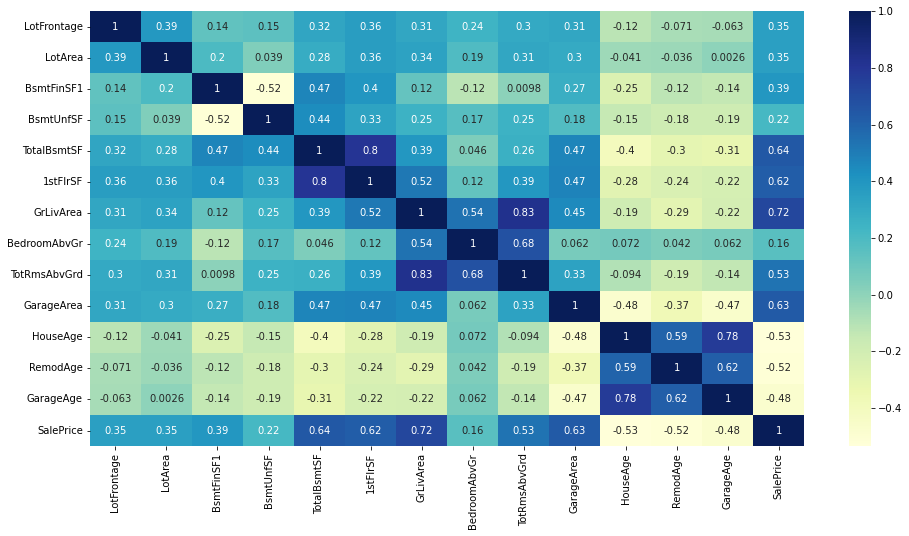

In [532]:
# figure size
plt.figure(figsize=(16,8))

# heatmap
sns.heatmap(cor, cmap="YlGnBu", annot=True)
plt.show()


According to the Heatmap Sale Price has highest co-relation with <i>'GrLivArea'</i>.
   * Lets plot scatter plot with GrLivArea
   * Also, lets see if it is predicted as one of the top 5 important features after Regularization

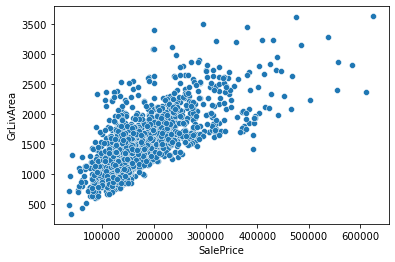

In [533]:
#Highest related features
sns.scatterplot(sales['SalePrice'], sales['GrLivArea']);

In [534]:
sales.head()

,MSSubClass,LotFrontage,LotArea,LotShape,Neighborhood,HouseStyle,OverallQual,OverallCond,Exterior1st,Exterior2nd,...,GarageType,GarageFinish,GarageCars,GarageArea,MoSold,YrSold,HouseAge,RemodAge,GarageAge,SalePrice
Id,,,,,,,,,,,,,,,,,,,,,
1,60,65.0,8450.0,Reg,CollgCr,2Story,7,5,VinylSd,VinylSd,...,Attchd,RFn,2,548,2,2008,20,20,20,208500
2,20,80.0,9600.0,Reg,Veenker,1Story,6,8,MetalSd,MetalSd,...,Attchd,RFn,2,460,5,2007,47,47,47,181500
3,60,68.0,11250.0,IR1,CollgCr,2Story,7,5,VinylSd,VinylSd,...,Attchd,RFn,2,608,9,2008,22,21,22,223500
4,70,60.0,9550.0,IR1,Crawfor,2Story,7,5,Wd Sdng,Wd Shng,...,Detchd,Unf,3,642,2,2006,108,53,25,140000
5,60,84.0,14260.0,IR1,NoRidge,2Story,8,5,VinylSd,VinylSd,...,Attchd,RFn,3,836,12,2008,23,23,23,250000


In [535]:
sales_copy = sales

In [536]:
sales_copy.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1458 entries, 1 to 1460
Data columns (total 36 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   MSSubClass    1458 non-null   object 
 1   LotFrontage   1458 non-null   float64
 2   LotArea       1458 non-null   float64
 3   LotShape      1458 non-null   object 
 4   Neighborhood  1458 non-null   object 
 5   HouseStyle    1458 non-null   object 
 6   OverallQual   1458 non-null   object 
 7   OverallCond   1458 non-null   object 
 8   Exterior1st   1458 non-null   object 
 9   Exterior2nd   1458 non-null   object 
 10  MasVnrType    1458 non-null   object 
 11  ExterQual     1458 non-null   object 
 12  Foundation    1458 non-null   object 
 13  BsmtQual      1458 non-null   object 
 14  BsmtExposure  1458 non-null   object 
 15  BsmtFinType1  1458 non-null   object 
 16  BsmtFinSF1    1458 non-null   float64
 17  BsmtUnfSF     1458 non-null   int64  
 18  TotalBsmtSF   1458 non-null 

[Content](#content)

<hr style="height:0.8px">

## 4. <a id='prepData' style="color:black; text-decoration:none;">Preparing Data<a>

In [537]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline

> * Creating 'X' & 'y'

In [538]:
#Target Variable
y = sales_copy['SalePrice']  

#Features
X = sales_copy.drop('SalePrice', axis=1)   

In [539]:
# Make list of categorical and numerical columns
cat_col = list(X.select_dtypes(include=['object']).columns)
num_col = list(X.select_dtypes(include=['int64', 'float64']).columns)

In [540]:
cat_col, len(cat_col), num_col, len(num_col)

(['MSSubClass',
  'LotShape',
  'Neighborhood',
  'HouseStyle',
  'OverallQual',
  'OverallCond',
  'Exterior1st',
  'Exterior2nd',
  'MasVnrType',
  'ExterQual',
  'Foundation',
  'BsmtQual',
  'BsmtExposure',
  'BsmtFinType1',
  'HeatingQC',
  'FullBath',
  'KitchenQual',
  'GarageType',
  'GarageFinish',
  'GarageCars',
  'MoSold',
  'YrSold'],
 22,
 ['LotFrontage',
  'LotArea',
  'BsmtFinSF1',
  'BsmtUnfSF',
  'TotalBsmtSF',
  '1stFlrSF',
  'GrLivArea',
  'BedroomAbvGr',
  'TotRmsAbvGrd',
  'GarageArea',
  'HouseAge',
  'RemodAge',
  'GarageAge'],
 13)

> * One Hot encoding

In [541]:
# Performing one hot encoding on categorical Columns

X_encode = pd.get_dummies(X[cat_col], columns=cat_col)  # Creating Dummies
X = X.drop(cat_col, axis=1)   # Drop categorical columns
X = pd.concat([X, X_encode], axis=1)    # Concatinating dummy variables with numerical in X
X

,LotFrontage,LotArea,BsmtFinSF1,BsmtUnfSF,TotalBsmtSF,1stFlrSF,GrLivArea,BedroomAbvGr,TotRmsAbvGrd,GarageArea,...,MoSold_8,MoSold_9,MoSold_10,MoSold_11,MoSold_12,YrSold_2006,YrSold_2007,YrSold_2008,YrSold_2009,YrSold_2010
Id,,,,,,,,,,,,,,,,,,,,,
1,65.0,8450.0,706.0,150,856.0,856.0,1710.0,3,8,548,...,0,0,0,0,0,0,0,1,0,0
2,80.0,9600.0,978.0,284,1262.0,1262.0,1262.0,3,6,460,...,0,0,0,0,0,0,1,0,0,0
3,68.0,11250.0,486.0,434,920.0,920.0,1786.0,3,6,608,...,0,1,0,0,0,0,0,1,0,0
4,60.0,9550.0,216.0,540,756.0,961.0,1717.0,3,7,642,...,0,0,0,0,0,1,0,0,0,0
5,84.0,14260.0,655.0,490,1145.0,1145.0,2198.0,4,9,836,...,0,0,0,0,1,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1456,62.0,7917.0,0.0,953,953.0,953.0,1647.0,3,7,460,...,1,0,0,0,0,0,1,0,0,0
1457,85.0,13175.0,790.0,589,1542.0,2073.0,2073.0,3,7,500,...,0,0,0,0,0,0,0,0,0,1
1458,66.0,9042.0,275.0,877,1152.0,1188.0,2340.0,4,9,252,...,0,0,0,0,0,0,0,0,0,1


In [543]:
int_X = X
int_y = y

[Content](#content)
    
<hr style="height:0.8px">

##  5. <a id='model' style="color:black; text-decoration:none;">Modelling<a>

In [544]:
#import libs
from sklearn import linear_model, metrics
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import train_test_split

> ### Preprations:

* Instante Algorithms
* Create Pipelines
* Define Grids
* Split Data

In [545]:
#Instantiate Algorithms
linear = LinearRegression()
ridge = Ridge()
lasso = Lasso()

In [551]:
#Creating pipelines

# 1. Linear Regression
lin_pipeline = Pipeline(steps = [
    ('scaler', MinMaxScaler()),
    ('model', linear)
])

# 2. Ridge Regression
ridge_pipeline = Pipeline(steps = [
    ('scaler', MinMaxScaler()),
    ('model', ridge)
])

# 3. Lasso Regression
lasso_pipeline = Pipeline(steps = [
    ('scaler', MinMaxScaler()),
    ('model', lasso)
])

# Defining hyperparameters (alpha value) for ridge and lasso Regression
params = {'model__alpha':[0.0001, 0.001, 0.01, 0.05, 
                   0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9,
                   1.0, 2.0, 3.0, 4.0, 5.0, 6.0, 7.0, 8.0, 9.0,
                  10.0, 20, 50, 100, 500, 1000]}

# Defining GridSearchCV
folds = 8
lin_grid = GridSearchCV(lin_pipeline, param_grid={}, cv=folds, return_train_score=True,verbose=1)
ridge_grid = GridSearchCV(ridge_pipeline, param_grid=params, cv=folds, return_train_score=True, verbose=1)
lasso_grid = GridSearchCV(lasso_pipeline, param_grid=params, cv=folds, return_train_score=True, verbose=1)

In [552]:
# Splitting data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

> ### Fitting Data

> ### a) <a id='lrmodel' style="color:black; text-decoration:none;">Linear Regression<a>

In [553]:
# fit data
lin_grid.fit(X_train, y_train)

Fitting 8 folds for each of 1 candidates, totalling 8 fits


GridSearchCV(cv=8,
             estimator=Pipeline(steps=[('scaler', MinMaxScaler()),
                                       ('model', LinearRegression())]),
             param_grid={}, return_train_score=True, verbose=1)

In [554]:
#Linear Regression Intercept and Coefficient

lin_best_estimator = lin_grid.best_estimator_
intercept = lin_best_estimator.named_steps['model'].intercept_
coefficients = lin_best_estimator.named_steps['model'].coef_
print(f'Intercept:{intercept}')
print(f'Coefficients:{coefficients}')

Intercept:864293416007878.9
Coefficients:[ 1.09882713e+04  1.35378531e+03  2.41450702e+04 -1.68107305e+04
  9.60449747e+04 -9.24777083e+04  2.91083723e+05 -5.57275751e+04
  1.10869313e+04 -9.74424035e+03 -5.39993378e+04 -4.97277283e+03
 -1.12343927e+04  2.75645327e+12  2.75645327e+12  2.75645328e+12
  2.75645328e+12  2.75645328e+12  2.75645328e+12  2.75645329e+12
  2.75645329e+12  2.75645327e+12  2.75645327e+12  2.75645325e+12
  2.75645325e+12  2.75645325e+12  2.75645325e+12  2.75645328e+12
 -2.17684062e+13 -2.17684062e+13 -2.17684062e+13 -2.17684062e+13
 -1.44827902e+13 -1.44827902e+13 -1.44827902e+13 -1.44827902e+13
 -1.44827902e+13 -1.44827902e+13 -1.44827902e+13 -1.44827902e+13
 -1.44827902e+13 -1.44827902e+13 -1.44827902e+13 -1.44827902e+13
 -1.44827902e+13 -1.44827902e+13 -1.44827902e+13 -1.44827902e+13
 -1.44827902e+13 -1.44827902e+13 -1.44827902e+13 -1.44827902e+13
 -1.44827902e+13 -1.44827902e+13 -1.44827902e+13 -1.44827902e+13
 -1.44827902e+13  2.82393841e+12  2.82393844e+12 

In [555]:
# Linear Scores

# Getting best parameters from linear grid
linear_best_estimator = lin_grid.best_estimator_

# Getting predicted values
y_train_pred = lin_best_estimator.predict(X_train)
y_test_pred = lin_best_estimator.predict(X_test)

# Calculating metrics
#r2 score
r2_train = r2_score(y_train, y_train_pred)
r2_test = r2_score(y_test, y_test_pred)

#Residual Sum of Squares
rss_train = ((y_train_pred - y_train)**2).sum() 
rss_test = ((y_test_pred - y_test)**2).sum()

#Mean Squared Error
mse_train = mean_squared_error(y_train, y_train_pred) 
mse_test = mean_squared_error(y_test, y_test_pred)

#Creating metrics variable to store metrics
lr_metric = [r2_train, r2_test, rss_train, rss_test, mse_train, mse_test]

# Print Metrics
print('Train:')
print(f'R2 Score:{r2_train}')
print(f'RSS:{rss_train}')
print(f'MSE:{mse_train}')

print('\nTest:')
print(f'R2 Score:{r2_test}')
print(f'RSS:{rss_test}')
print(f'MSE:{mse_test}')

# lr_metric

Train:
R2 Score:0.9226785754230601
RSS:539411169807.6875
MSE:462616783.71156734

Test:
R2 Score:0.8939359092333321
RSS:167902443873.39062
MSE:575008369.42942


<hr>

> ### b) <a id='rgmodel' style="color:black; text-decoration:none;">Ridge Regression<a>

In [556]:
# fit model
ridge_grid.fit(X_train, y_train)

Fitting 8 folds for each of 28 candidates, totalling 224 fits


GridSearchCV(cv=8,
             estimator=Pipeline(steps=[('scaler', MinMaxScaler()),
                                       ('model', Ridge())]),
             param_grid={'model__alpha': [0.0001, 0.001, 0.01, 0.05, 0.1, 0.2,
                                          0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9,
                                          1.0, 2.0, 3.0, 4.0, 5.0, 6.0, 7.0,
                                          8.0, 9.0, 10.0, 20, 50, 100, 500,
                                          1000]},
             return_train_score=True, verbose=1)

In [557]:
# Best alpha value
ridge_grid.best_params_['model__alpha']

0.6

In [558]:
# Using best alpha value to fit ridge model
alpha = 0.6
ridge = Ridge(alpha=alpha)
ridge_pipeline.fit(X_train, y_train)
print(ridge_pipeline.named_steps['model'].intercept_)
print(ridge_pipeline.named_steps['model'].coef_)

120605.68991840424
[ 1.08806655e+04  1.09567097e+03  3.40588203e+04 -5.47072290e+03
  5.43297254e+04 -2.22704467e+03  1.87178532e+05 -3.51078750e+04
  1.99307561e+04  1.97776200e+03 -3.89118973e+04 -5.72099106e+03
 -7.24678922e+03  4.17814917e+03  9.17752297e+02  1.17230809e+04
  1.98748565e+03  4.89800662e+03  1.18421010e+04  9.91859419e+03
  1.78915942e+04  2.98668019e+03 -2.31126990e+03 -1.60478212e+04
 -1.52525989e+04 -1.86368024e+04 -1.29392173e+04 -1.15573433e+03
 -3.64195092e+03  9.92447006e+03 -3.01519426e+03 -3.26732488e+03
  4.29721798e+02 -2.43035419e+02  3.93546212e+03 -4.87606436e+03
  3.59167954e+03 -3.54978775e+03  1.79867272e+04 -1.88145654e+04
 -2.64873254e+03 -1.51320014e+04 -1.14379595e+04 -1.36953324e+04
 -1.38151271e+04  1.28546536e+04 -9.66606688e+03  2.28261984e+04
  2.25788749e+04 -2.01218001e+04 -1.54501780e+04 -1.07996862e+04
 -4.05022033e+03  1.30893396e+04  4.12789359e+04 -1.12436793e+03
  6.85333225e+03 -2.96272192e+03  4.79759106e+03  2.13907024e+03
  7.15

In [559]:
# Ridge Scores

# Getting best parameters from Ridge grid
ridge_best_estimator = ridge_grid.best_estimator_

# Getting predicted values
y_train_pred = ridge_best_estimator.predict(X_train)
y_test_pred = ridge_best_estimator.predict(X_test)

# Calculating metrics
#r2 score
r2_train = r2_score(y_train, y_train_pred)
r2_test = r2_score(y_test, y_test_pred)

#Residual Sum of Squares
rss_train = ((y_train_pred - y_train)**2).sum() 
rss_test = ((y_test_pred - y_test)**2).sum()

#Mean Squared Error
mse_train = mean_squared_error(y_train, y_train_pred) 
mse_test = mean_squared_error(y_test, y_test_pred)

#Creating metrics variable to store metrics
ridge_metric = [r2_train, r2_test, rss_train, rss_test, mse_train, mse_test]

# Print Metrics
print('Train:')
print(f'R2 Score:{r2_train}')
print(f'RSS:{rss_train}')
print(f'MSE:{mse_train}')

print('\nTest:')
print(f'R2 Score:{r2_test}')
print(f'RSS:{rss_test}')
print(f'MSE:{mse_test}')

# ridge_metric

Train:
R2 Score:0.9206913945049721
RSS:553274178534.0562
MSE:474506156.54721797

Test:
R2 Score:0.8943487145710505
RSS:167248961393.63818
MSE:572770415.7316376


#### Top5 Predictor variables after Ridge

In [560]:
coef = ridge_pipeline.named_steps['model'].coef_
abs_coef = np.abs(coef)
top_10_idx = np.argsort(abs_coef)[::-1][:10]
rg_top_10_vars = X.columns[top_10_idx]
rg_top_10_vars

Index(['GrLivArea', 'TotalBsmtSF', 'Neighborhood_StoneBr', 'HouseAge',
       'OverallQual_9', 'BedroomAbvGr', 'BsmtFinSF1', 'OverallQual_10',
       'OverallCond_9', 'Neighborhood_NoRidge'],
      dtype='object')

<hr>

> ### c) <a id='lsmodel' style="color:black; text-decoration:none;">Lasso Regression<a>

In [561]:
# fit model
lasso_grid.fit(X_train, y_train)

Fitting 8 folds for each of 28 candidates, totalling 224 fits


GridSearchCV(cv=8,
             estimator=Pipeline(steps=[('scaler', MinMaxScaler()),
                                       ('model', Lasso())]),
             param_grid={'model__alpha': [0.0001, 0.001, 0.01, 0.05, 0.1, 0.2,
                                          0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9,
                                          1.0, 2.0, 3.0, 4.0, 5.0, 6.0, 7.0,
                                          8.0, 9.0, 10.0, 20, 50, 100, 500,
                                          1000]},
             return_train_score=True, verbose=1)

In [562]:
#Best alpha value
lasso_grid.best_params_['model__alpha']

50

In [563]:
# Using best alpha value to fit lasso model
alpha = 50
lasso = Lasso(alpha=alpha)
lasso_pipeline.fit(X_train, y_train)
print(lasso_pipeline.named_steps['model'].intercept_)
print(lasso_pipeline.named_steps['model'].coef_)

103511.6375585775
[ 1.08320809e+04  1.49599199e+03  2.44440540e+04 -1.64682488e+04
  9.42245208e+04 -8.98148370e+04  2.89390056e+05 -5.52973523e+04
  1.04867511e+04 -8.88800490e+03 -5.40572821e+04 -4.94410148e+03
 -1.09565253e+04 -5.14038246e+02 -1.20361835e+03  6.24990746e+03
  5.07475956e+03  6.52821085e+03  7.89685523e+03  1.22285545e+04
  1.74710070e+04  0.00000000e+00 -7.40942348e+03 -1.95836226e+04
 -2.30849794e+04 -2.26186702e+04 -2.31267320e+04  1.87595565e+03
 -4.84493521e+02  1.34266727e+04  1.75878666e+02 -4.11427750e+02
  5.58886050e+03  2.24314868e+03  1.23008349e+04 -2.72568448e+03
  2.98278827e+03 -5.97922070e+02  1.90057028e+04 -1.46289328e+04
 -0.00000000e+00 -1.13952652e+04 -9.08330309e+03 -1.11821207e+04
 -1.08516277e+04  1.93973890e+04 -6.92384350e+03  2.11168448e+04
  2.62503795e+04 -1.84482901e+04 -1.32473546e+04 -7.77275566e+03
 -9.01555608e+02  1.67637737e+04  4.52233355e+04  2.26603003e+03
  8.06199985e+03 -2.94328992e+03  1.70630325e+04  1.92793581e+04
 -1.630

In [564]:
# Lasso Scores

# Getting best parameters from Lasso grid
lasso_best_estimator = lasso_grid.best_estimator_

# Getting predicted values
y_train_pred = lasso_best_estimator.predict(X_train)
y_test_pred = lasso_best_estimator.predict(X_test)

# Calculating metrics
#r2 score
r2_train = r2_score(y_train, y_train_pred)
r2_test = r2_score(y_test, y_test_pred)

#Residual Sum of Squares
rss_train = ((y_train_pred - y_train)**2).sum() 
rss_test = ((y_test_pred - y_test)**2).sum()

#Mean Squared Error
mse_train = mean_squared_error(y_train, y_train_pred) 
mse_test = mean_squared_error(y_test, y_test_pred)

#Creating metrics variable to store metrics
lasso_metric = [r2_train, r2_test, rss_train, rss_test, mse_train, mse_test]

# Print Metrics
print('Train:')
print(f'R2 Score:{r2_train}')
print(f'RSS:{rss_train}')
print(f'MSE:{mse_train}')

print('\nTest:')
print(f'R2 Score:{r2_test}')
print(f'RSS:{rss_test}')
print(f'MSE:{mse_test}')

# lasso_metric

Train:
R2 Score:0.9176921840933856
RSS:574197326361.001
MSE:492450537.18782246

Test:
R2 Score:0.8983856074071416
RSS:160858446300.96857
MSE:550885090.0718101


#### Top 5 Predictor variables after Lasso

In [565]:
coef = lasso_pipeline.named_steps['model'].coef_
abs_coef = np.abs(coef)
top_10_idx = np.argsort(abs_coef)[::-1][:10]
ls_top_10_vars = X.columns[top_10_idx]
ls_top_10_vars

Index(['GrLivArea', 'TotalBsmtSF', '1stFlrSF', 'BedroomAbvGr', 'OverallCond_1',
       'HouseAge', 'Neighborhood_StoneBr', 'OverallQual_9', 'OverallQual_10',
       'Foundation_Wood'],
      dtype='object')

#### Extracting features positively and negatively related
Also, extracting features that have no co-relation, i.e. with coefficient as Zero

In [566]:
lasso_coef = lasso_pipeline.named_steps['model'].coef_
all_cols = X.columns
pos_rel_features = [col for col, coef in zip(all_cols, lasso_coef) if coef > 0]
neg_rel_features = [col for col, coef in zip(all_cols, lasso_coef) if coef < 0]
zero_rel_features = [col for col, coef in zip(all_cols, lasso_coef) if coef == 0]

In [567]:
# pos_rel_features, neg_rel_features

In [568]:
pos_feat = {}  #Dictionary of positively related features with values
neg_feat = {}  #Dictionary of negatively related features with values
zero_feat = {} #Dictionary of features that are eliminated

#Extracting features

#Positive
for i in pos_rel_features:
    if '_' in i:
        feat_val = i.split('_')
        key = feat_val[0]
        value = feat_val[1]
        if key in pos_feat:
            pos_feat[key].append(value)
        else:
            pos_feat[key] = [value]
    else:
        pos_feat[i] = []

#Negative        
for i in neg_rel_features:
    if '_' in i:
        feat_val = i.split('_')
        key = feat_val[0]
        value = feat_val[1]
        if key in neg_feat:
            neg_feat[key].append(value)
        else:
            neg_feat[key] = [value]
    else:
        neg_feat[i] = []

#Eliminated        
for i in zero_rel_features:
    if '_' in i:
        feat_val = i.split('_')
        key = feat_val[0]
        value = feat_val[1]
        if key in zero_feat:
            zero_feat[key].append(value)
        else:
            zero_feat[key] = [value]
    else:
        zero_feat[i] = []


* #### Positively Related Features

In [569]:
for i, v in pos_feat.items():
    print(f'{i}:{v}')

LotFrontage:[]
LotArea:[]
BsmtFinSF1:[]
TotalBsmtSF:[]
GrLivArea:[]
TotRmsAbvGrd:[]
MSSubClass:['40', '45', '50', '60', '70', '75', '190']
LotShape:['IR2', 'IR3']
Neighborhood:['Blmngtn', 'Blueste', 'BrDale', 'ClearCr', 'Crawfor', 'NPkVill', 'NoRidge', 'NridgHt', 'Somerst', 'StoneBr', 'Timber', 'Veenker']
HouseStyle:['1.5Unf', '1Story', 'SFoyer', 'SLvl']
OverallQual:['1', '8', '9', '10']
OverallCond:['6', '7', '8', '9']
Exterior1st:['AsbShng', 'AsphShn', 'BrkFace', 'CemntBd', 'MetalSd', 'Stucco', 'WdShing']
Exterior2nd:['AsphShn', 'Brk Cmn', 'BrkFace', 'MetalSd', 'Plywood', 'VinylSd', 'Wd Sdng']
MasVnrType:['BrkFace', 'Stone']
ExterQual:['Ex', 'TA']
Foundation:['CBlock', 'PConc', 'Slab']
BsmtQual:['Ex', 'Fa']
BsmtExposure:['Av', 'Gd']
BsmtFinType1:['ALQ', 'GLQ', 'Unf']
HeatingQC:['Ex', 'Fa']
FullBath:['1', '3']
KitchenQual:['Ex', 'Gd']
GarageType:['Attchd', 'Basment', 'Detchd']
GarageFinish:['RFn']
GarageCars:['3', '4']
MoSold:['3', '5', '6', '7', '8', '9']
YrSold:['2006', '2010']


* ####  Negatively Related Features

In [570]:
for i, v in neg_feat.items():
    print(f'{i}:{v}')

BsmtUnfSF:[]
1stFlrSF:[]
BedroomAbvGr:[]
GarageArea:[]
HouseAge:[]
RemodAge:[]
GarageAge:[]
MSSubClass:['20', '30', '85', '90', '120', '160', '180']
LotShape:['IR1', 'Reg']
Neighborhood:['BrkSide', 'CollgCr', 'Edwards', 'IDOTRR', 'MeadowV', 'Mitchel', 'NAmes', 'NWAmes', 'OldTown', 'SWISU', 'Sawyer', 'SawyerW']
HouseStyle:['1.5Fin', '2.5Fin', '2.5Unf', '2Story']
OverallQual:['3', '4', '5', '6', '7']
OverallCond:['1', '2', '3', '4', '5']
Exterior1st:['BrkComm', 'CBlock', 'HdBoard', 'ImStucc', 'Plywood', 'Stone', 'VinylSd']
Exterior2nd:['AsbShng', 'CBlock', 'CmentBd', 'ImStucc', 'Other', 'Stucco', 'Wd Shng']
MasVnrType:['BrkCmn', 'None']
ExterQual:['Fa', 'Gd']
Foundation:['BrkTil', 'Stone', 'Wood']
BsmtQual:['Gd', 'TA']
BsmtExposure:['Mn', 'No']
BsmtFinType1:['BLQ', 'LwQ', 'Rec']
HeatingQC:['Gd', 'Po']
FullBath:['0', '2']
KitchenQual:['Fa', 'TA']
GarageType:['2Types', 'BuiltIn', 'CarPort']
GarageFinish:['Unf']
GarageCars:['0', '1', '2']
MoSold:['1', '2', '4', '10', '11', '12']
YrSold:['20

* #### Features with no corelation

In [571]:
for i, v in zero_feat.items():
    print(f'{i}:{v}')

MSSubClass:['80']
Neighborhood:['Gilbert']
OverallQual:['2']
Exterior1st:['Wd Sdng']
Exterior2nd:['HdBoard', 'Stone']
HeatingQC:['TA']
GarageFinish:['Fin']
YrSold:['2008']


[Content...](#content)

    
<hr style="height:0.8px">

## 6. <a id='metric' style="color:black; text-decoration:none;">Metrics Analysis<a>

> ### Metrics from all three Models

In [572]:
#Create Metrics table for all three model
lr_table = {'Metric':['R2_Score (Train)', 'R2 Score (Test)',
                  'RSS (Train)', 'RSS (Test)',
                  'MSE (Train)', 'MSE (Test)'],
        'Linear Regression':lr_metric}

lin_metric = pd.DataFrame(lr_table, columns = ['Metric', 'Linear Regression'])
rg_metric = pd.Series(ridge_metric, name = 'Ridge Regression')
ls_metric = pd.Series(lasso_metric, name = 'Lasso Regression')

final_metric = pd.concat([lin_metric, rg_metric, ls_metric], axis=1)
final_metric.set_index('Metric', inplace=True)
final_metric

,Linear Regression,Ridge Regression,Lasso Regression
Metric,,,
R2_Score (Train),9.226786e-01,9.206914e-01,9.176922e-01
R2 Score (Test),8.939359e-01,8.943487e-01,8.983856e-01
RSS (Train),5.394112e+11,5.532742e+11,5.741973e+11
RSS (Test),1.679024e+11,1.672490e+11,1.608584e+11
MSE (Train),4.626168e+08,4.745062e+08,4.924505e+08
MSE (Test),5.750084e+08,5.727704e+08,5.508851e+08


> ### Coefficients of all features from all three Models

In [573]:
#Change in coefficients after regularization
betas = pd.DataFrame(index=all_cols)
betas.rows = all_cols

In [574]:
betas['Linear'] = lin_best_estimator.named_steps['model'].intercept_
betas['Ridge'] = ridge_pipeline.named_steps['model'].coef_
betas['Lasso'] = lasso_pipeline.named_steps['model'].coef_

In [575]:
# pd.set_option('display.max_rows', None)
betas

,Linear,Ridge,Lasso
LotFrontage,8.642934e+14,10880.665469,10832.080938
LotArea,8.642934e+14,1095.670966,1495.991993
BsmtFinSF1,8.642934e+14,34058.820280,24444.054014
BsmtUnfSF,8.642934e+14,-5470.722905,-16468.248817
TotalBsmtSF,8.642934e+14,54329.725385,94224.520797
...,...,...,...
YrSold_2006,8.642934e+14,1331.863321,742.366972
YrSold_2007,8.642934e+14,-1318.777986,-1982.776010
YrSold_2008,8.642934e+14,417.799305,-0.000000
YrSold_2009,8.642934e+14,-2193.791443,-3030.850175


#### Top 5 Features from all 3 Models

In [619]:
print('Ridge top 5 in Order:')
for i in range(5):
    print(f'{i+1}. {rg_top_10_vars[i]}')
print('\nLasso top 5 in Order:')
for i in range(5):
    print(f'{i+1}. {ls_top_10_vars[i]}')

Ridge top 5 in Order:
1. GrLivArea
2. TotalBsmtSF
3. Neighborhood_StoneBr
4. HouseAge
5. OverallQual_9

Lasso top 5 in Order:
1. GrLivArea
2. TotalBsmtSF
3. 1stFlrSF
4. BedroomAbvGr
5. HouseAge


## 7. <a id='modlChoice' style="color:black; text-decoration:none;">Model Chosen:<a>

* As we can see Lasso regression has not much difference from Ridge regression scores, but it has successfully removed below features:

In [577]:
for i, v in zero_feat.items():
    print(f'{i}:{v}')

MSSubClass:['80']
Neighborhood:['Gilbert']
OverallQual:['2']
Exterior1st:['Wd Sdng']
Exterior2nd:['HdBoard', 'Stone']
HeatingQC:['TA']
GarageFinish:['Fin']
YrSold:['2008']


#### Scores:

In [620]:
final_metric

,Linear Regression,Ridge Regression,Lasso Regression
Metric,,,
R2_Score (Train),9.226786e-01,9.206914e-01,9.176922e-01
R2 Score (Test),8.939359e-01,8.943487e-01,8.983856e-01
RSS (Train),5.394112e+11,5.532742e+11,5.741973e+11
RSS (Test),1.679024e+11,1.672490e+11,1.608584e+11
MSE (Train),4.626168e+08,4.745062e+08,4.924505e+08
MSE (Test),5.750084e+08,5.727704e+08,5.508851e+08


#### Top features

In [621]:
print('Ridge top 5 in Order:')
for i in range(5):
    print(f'{i+1}. {rg_top_10_vars[i]}')
print('\nLasso top 5 in Order:')
for i in range(5):
    print(f'{i+1}. {ls_top_10_vars[i]}')

Ridge top 5 in Order:
1. GrLivArea
2. TotalBsmtSF
3. Neighborhood_StoneBr
4. HouseAge
5. OverallQual_9

Lasso top 5 in Order:
1. GrLivArea
2. TotalBsmtSF
3. 1stFlrSF
4. BedroomAbvGr
5. HouseAge


> #### Conclusion:

Lasso regression:
* Lasso's Regression's alpha value is higher than Ridge but still it is not very high.
* But, with this higher alpha value, it is still selecting better top 5 features than Ridge Regression.
* Lasso’s test scores are slightly better than Ridge scores.
* And after performing lasso some features are also eliminated which can not be done in Ridge regression

Thus, i will choose <b>Lasso Regression</b> for further modelling.

[Content...](#content)
    
<hr style='height:0.8px'>

## 8. <a id='finFit' style="color:black; text-decoration:none;">Final Fit<a>

Selecting final features by applying Lasso Regression and removing more features

- While performing Lasso earlier, among top 10 features there was a feature 'OverallCond_1', which is somehoe among top 10 features but does not quite fit to be among top features.
- So, we will be dropping this feature and performing Lasso Regression for further feature selection

> ### a) Get final features by recusrsive removal using Lasso

In [596]:
# Saving X dataset
X_copy = int_X.drop(['OverallCond_1'], axis=1)
y_copy = y

# Adding 'OverallCond_1' to removed features list
zero_rel_features.append('OverallCond_1')

In [597]:
#Function to fit model
def fit_model(X_train, y_train):
    #Fit Lasso Model
    lasso = Lasso(alpha=50)
    lasso_pipeline.fit(X_train, y_train)
    
    #Extract Features
    lasso_coef = lasso_pipeline.named_steps['model'].coef_
    all_cols = X.columns
    zero_feat = [col for col, coef in zip(all_cols, lasso_coef) if coef == 0]            
    return zero_feat

In [598]:
# Select final 100
features_to_select = 100
fin_feat = None
X = X_copy
y = y_copy
all_feat_del = zero_rel_features
while True:
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
    zero_feat = fit_model(X_train, y_train)
    all_feat_del.extend(zero_feat)
    feat_to_del = len(zero_feat)
    
    if feat_to_del > 0:
        print(f'Features Eliminated:{zero_feat}')
        print(f'Features Eliminated Length:{len(zero_feat)}')
        print(f'Total Features Length:{len(X.columns)}')    
        X = X.drop(zero_feat, axis=1)
    else:
        fin_feat = X.columns
        break    

Features Eliminated:['MSSubClass_80', 'Neighborhood_Gilbert', 'Exterior1st_Wd Sdng', 'Exterior2nd_HdBoard', 'Exterior2nd_Stone', 'HeatingQC_TA', 'GarageType_Basment', 'GarageFinish_Fin', 'YrSold_2008']
Features Eliminated Length:9
Total Features Length:186


In [599]:
#All deleted features
# all_feat_del

In [600]:
#Copying final columns
sales_fin = X[list(fin_feat)]

In [ ]:
#Final Feature
# list(fin_feat)

In [601]:
coef = lasso_pipeline.named_steps['model'].coef_
abs_coef = np.abs(coef)
top_10_idx = np.argsort(abs_coef)[::-1][:10]
ls_top_10_vars = X.columns[top_10_idx]
ls_top_10_vars

Index(['GrLivArea', 'TotalBsmtSF', '1stFlrSF', 'BedroomAbvGr', 'HouseAge',
       'OverallCond_9', 'Neighborhood_StoneBr', 'OverallQual_9',
       'OverallQual_10', 'OverallCond_7'],
      dtype='object')

> ### b) Fit Lasso model with finalized features

In [603]:
#Model fit
X = sales_fin
y = int_y
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
lasso = Lasso(alpha=50)
lasso_pipeline.fit(X_train, y_train)

Pipeline(steps=[('scaler', MinMaxScaler()), ('model', Lasso())])

In [604]:
#Final Scores
# Getting predicted values
y_train_pred = lasso_pipeline.predict(X_train)
y_test_pred = lasso_pipeline.predict(X_test)

# Calculating metrics
#r2 score
r2_train = r2_score(y_train, y_train_pred)
r2_test = r2_score(y_test, y_test_pred)

#Residual Sum of Squares
rss_train = ((y_train_pred - y_train)**2).sum() 
rss_test = ((y_test_pred - y_test)**2).sum()

#Mean Squared Error
mse_train = mean_squared_error(y_train, y_train_pred) 
mse_test = mean_squared_error(y_test, y_test_pred)

#Creating metrics variable to store metrics
final_lasso_metric = [r2_train, r2_test, rss_train, rss_test, mse_train, mse_test]

# Print Metrics
print('Train:')
print(f'R2 Score:{r2_train}')
print(f'RSS:{rss_train}')
print(f'MSE:{mse_train}')

print('\nTest:')
print(f'R2 Score:{r2_test}')
print(f'RSS:{rss_test}')
print(f'MSE:{mse_test}')


Train:
R2 Score:0.9226234224670454
RSS:539795928892.05505
MSE:462946765.7736321

Test:
R2 Score:0.8945595919899033
RSS:166915136498.453
MSE:571627179.7892226


In [605]:
# Coefficients Dataframe
intercept = lasso_pipeline.named_steps['model'].intercept_
coefs = lasso_pipeline.named_steps['model'].coef_
features = X.columns
scaler = MinMaxScaler()

coefficients = pd.DataFrame({'Features':features, 'Coefficients':coefs})
scaler.fit(coefficients['Coefficients'].values.reshape(-1, 1))
coefficients['scaled_coefficients'] = scaler.transform(coefficients['Coefficients'].values.reshape(-1, 1))
coef_df_sorted = coefficients.sort_values(by=['Coefficients'], ascending=False).reset_index(drop=True)

In [607]:
# coef_df_sorted.head(10)

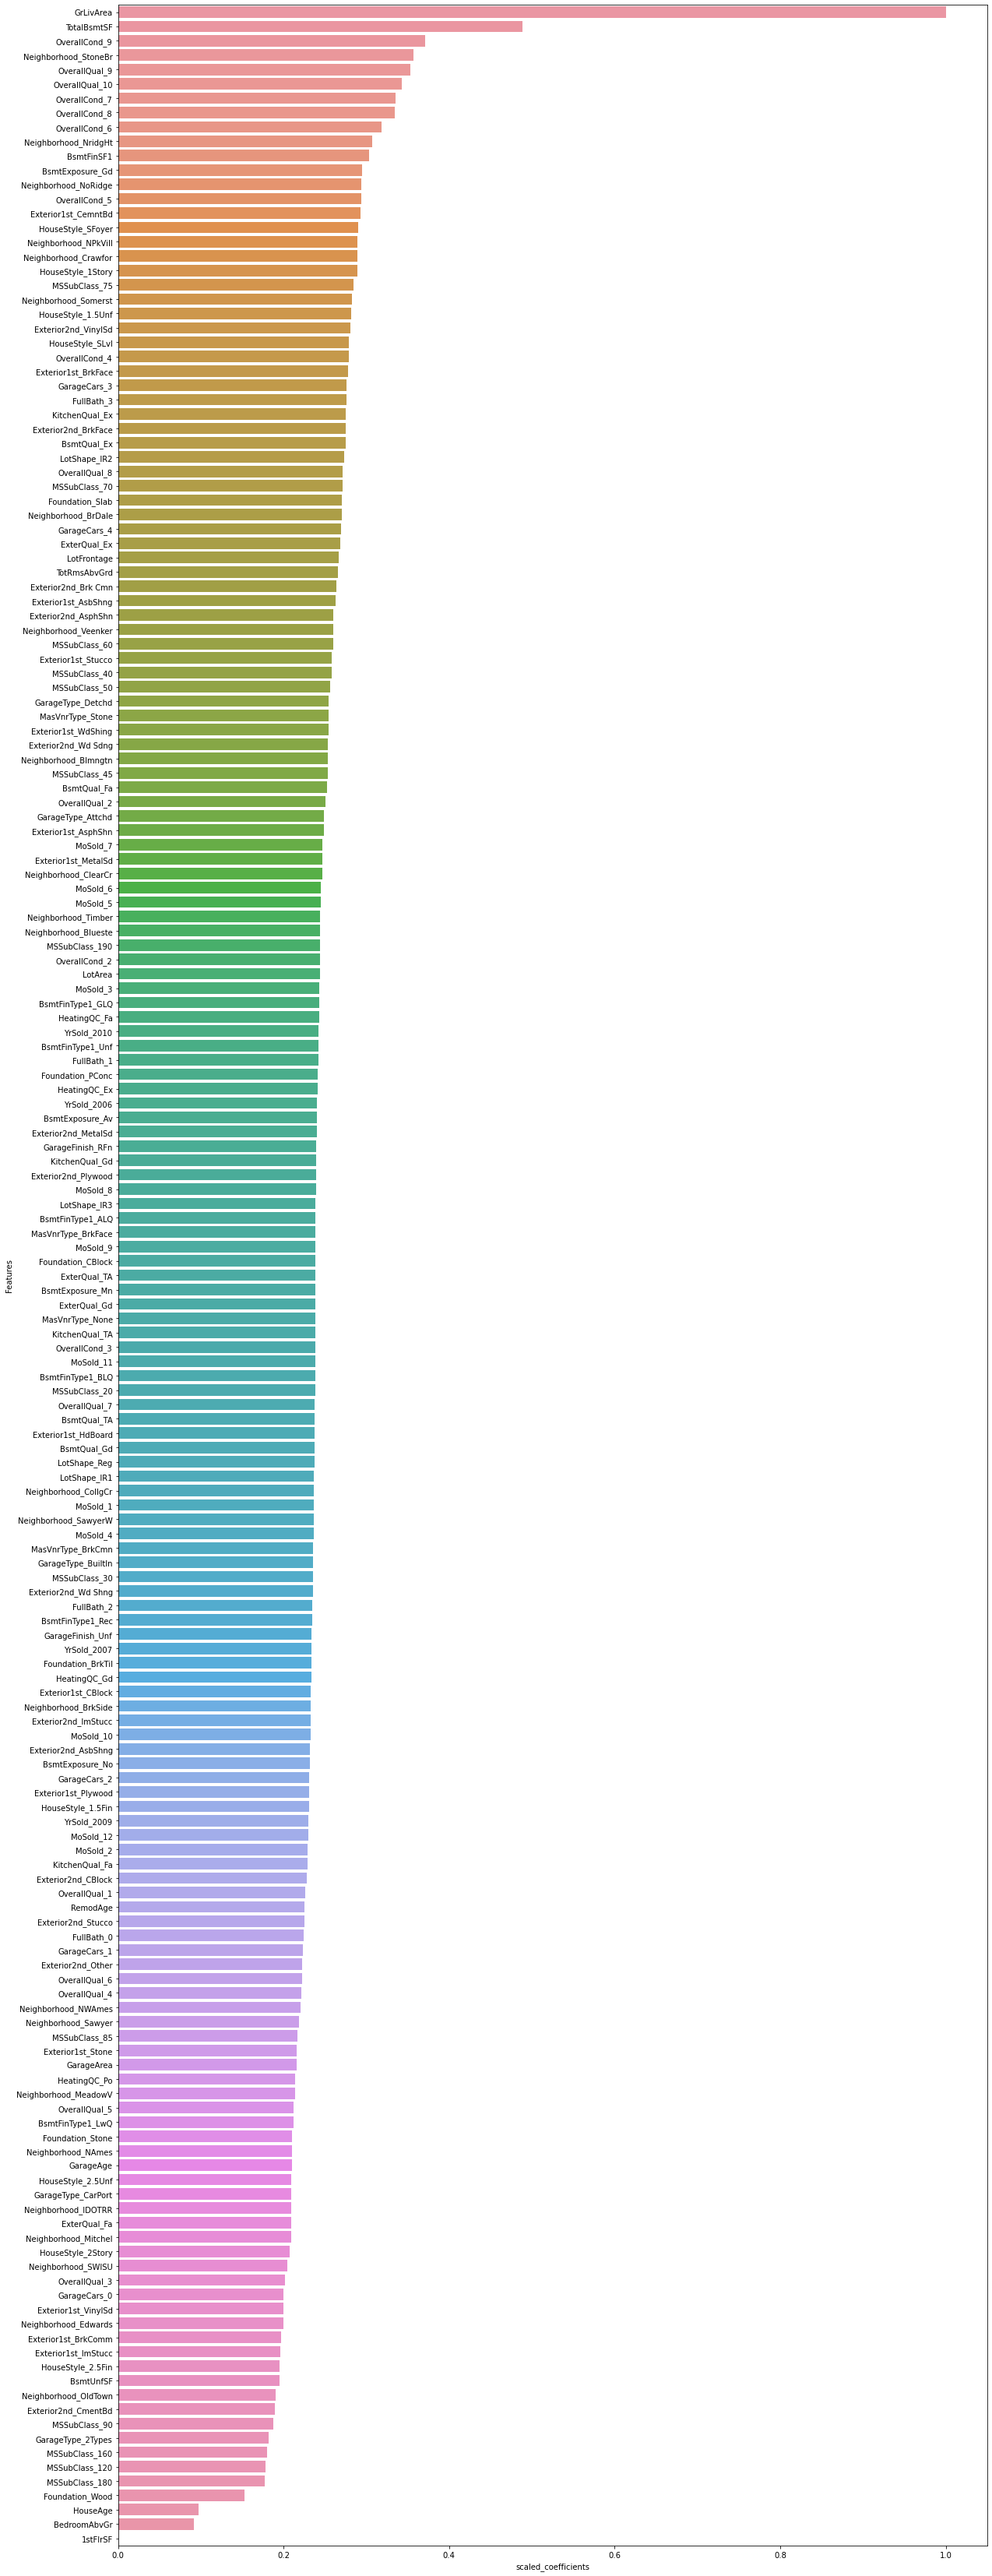

In [608]:
#Coefficient plot
plt.figure(figsize=(20,60))
sns.barplot(x='scaled_coefficients', y='Features', data=coef_df_sorted);

#### Residual Analysis

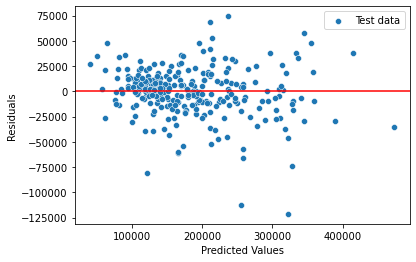

In [609]:

train_resid = y_train - y_train_pred
test_resid = y_test - y_test_pred

# Create scatter plot of residuals vs predicted values

# sns.scatterplot(y_train_pred, train_resid, label='Training data')  #  Test residuals
sns.scatterplot(y_test_pred, test_resid, label='Test data')   # Train Residuals
plt.axhline(y=0, color='r', linestyle='-')
plt.xlabel('Predicted Values')
plt.ylabel('Residuals')
# plt.legend()
plt.show()

* As we can see above residual plot shows a random scatter and no patterns are observed.
* So, we can say assumptions of this Regression Model

<AxesSubplot:xlabel='SalePrice'>

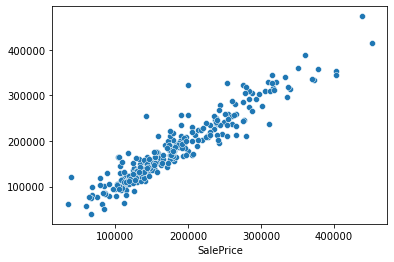

In [610]:
#Actual vs Predicted
sns.scatterplot(y_test, y_test_pred)

* As we can see Actual vs Predicted values follow a Linear relationship.

### So, from above Observations we can finalize this Model.

[Content...](#content)
    

<hr style="height:2px">

In [611]:
#Final features to use in questions
X = sales_fin
y = y_copy
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

<hr>

# <a id='ques' style="color:black; text-decoration:none;">Questions...<a>

### Ques 1.  
What is the optimal value of alpha for ridge and lasso regression? What will be the changes in the model if you choose double the value of alpha for both ridge and lasso? What will be the most important predictor variables after the change is implemented?

<hr style='width:50%'>

**I Will use finalized features to perform Ridge and lasso regression**


#### Ridge

In [612]:
# Ridge with origianl Alpha
alpha_rg = 0.6

ridge = Ridge(alpha=alpha_rg)
ridge_pipeline.fit(X_train, y_train)

# Getting predicted values
y_train_pred = ridge_pipeline.predict(X_train)
y_test_pred = ridge_pipeline.predict(X_test)

# Calculating metrics
#r2 score
r2_train = r2_score(y_train, y_train_pred)
r2_test = r2_score(y_test, y_test_pred)
#RSS
rss_train = ((y_train_pred - y_train)**2).sum() 
rss_test = ((y_test_pred - y_test)**2).sum()
#MSE
mse_train = mean_squared_error(y_train, y_train_pred) 
mse_test = mean_squared_error(y_test, y_test_pred)
#Creating metrics variable to store metrics
fin_ridge_metric = [r2_train, r2_test, rss_train, rss_test, mse_train, mse_test]

#Top 5 Features
coef = ridge_pipeline.named_steps['model'].coef_
abs_coef = np.abs(coef)
top_5_idx = np.argsort(abs_coef)[::-1][:5]
rg_top_5_vars = X.columns[top_5_idx]
# print(f'Top 5: {rg_top_5_vars}')
print(f'Most imp Feature: {rg_top_5_vars[0]}')

Most imp Feature: GrLivArea


In [613]:
#Ridge with double alpha
alpha_rg = 1.2
ridge = Ridge(alpha=alpha_rg)
ridge_pipeline.fit(X_train, y_train)

# Getting predicted values
y_train_pred = ridge_pipeline.predict(X_train)
y_test_pred = ridge_pipeline.predict(X_test)

# Calculating metrics
#r2 score
r2_train = r2_score(y_train, y_train_pred)
r2_test = r2_score(y_test, y_test_pred)
#Residual Sum of Squares
rss_train = ((y_train_pred - y_train)**2).sum() 
rss_test = ((y_test_pred - y_test)**2).sum()
#Mean Squared Error
mse_train = mean_squared_error(y_train, y_train_pred) 
mse_test = mean_squared_error(y_test, y_test_pred)

#Creating metrics variable to store metrics
ridge_metric_db = [r2_train, r2_test, rss_train, rss_test, mse_train, mse_test]
ridge_diffs = [fin_ridge_metric[i] - ridge_metric_db[i] for i in range(len(fin_ridge_metric))]

#Top 5 Features
coef = ridge_pipeline.named_steps['model'].coef_
abs_coef = np.abs(coef)
top_5_idx = np.argsort(abs_coef)[::-1][:5]
rg_top_5_vars = X.columns[top_5_idx]
# print(f'Top 5: {rg_top_5_vars}')
print(f'Most imp Feature: {rg_top_5_vars[0]}')
print(f'Diff in Metrics:{ridge_diffs}')

Most imp Feature: GrLivArea
Diff in Metrics:[0.0, 0.0, 0.0, 0.0, 0.0, 0.0]


#### Lasso

In [614]:
#Lasso with original alpha
alpha_ls = 50
lasso = Lasso(alpha=alpha_ls)
lasso_pipeline.fit(X_train, y_train)

# Getting predicted values
y_train_pred = lasso_pipeline.predict(X_train)
y_test_pred = lasso_pipeline.predict(X_test)

# Calculating metrics
#r2 score
r2_train = r2_score(y_train, y_train_pred)
r2_test = r2_score(y_test, y_test_pred)
#Residual Sum of Squares
rss_train = ((y_train_pred - y_train)**2).sum() 
rss_test = ((y_test_pred - y_test)**2).sum()
#Mean Squared Error
mse_train = mean_squared_error(y_train, y_train_pred) 
mse_test = mean_squared_error(y_test, y_test_pred)

#Creating metrics variable to store metrics
fin_lasso_metric = [r2_train, r2_test, rss_train, rss_test, mse_train, mse_test]


#Top 5 Features
coef = lasso_pipeline.named_steps['model'].coef_
abs_coef = np.abs(coef)
top_5_idx = np.argsort(abs_coef)[::-1][:5]
ls_top_5_vars = X.columns[top_5_idx]
# print(f'Top 5: {rg_top_5_vars}')
print(f'Most imp Feature: {ls_top_5_vars[0]}')

Most imp Feature: GrLivArea


In [615]:
#Lasso with double alpha
alpha_ls = 100
lasso = Lasso(alpha=alpha_ls)
lasso_pipeline.fit(X_train, y_train)

# Getting predicted values
y_train_pred = lasso_pipeline.predict(X_train)
y_test_pred = lasso_pipeline.predict(X_test)

# Calculating metrics
#r2 score
r2_train = r2_score(y_train, y_train_pred)
r2_test = r2_score(y_test, y_test_pred)
#Residual Sum of Squares
rss_train = ((y_train_pred - y_train)**2).sum() 
rss_test = ((y_test_pred - y_test)**2).sum()
#Mean Squared Error
mse_train = mean_squared_error(y_train, y_train_pred) 
mse_test = mean_squared_error(y_test, y_test_pred)

#Creating metrics variable to store metrics
lasso_metric_db = [r2_train, r2_test, rss_train, rss_test, mse_train, mse_test]
lasso_diffs = [fin_lasso_metric[i] - lasso_metric_db[i] for i in range(len(fin_lasso_metric))]

#Top 5 Features
coef = lasso_pipeline.named_steps['model'].coef_
abs_coef = np.abs(coef)
top_5_idx = np.argsort(abs_coef)[::-1][:5]
ls_top_5_vars = X.columns[top_5_idx]
# print(f'Top 5: {rg_top_5_vars}')
print(f'Most imp Feature: {ls_top_5_vars[0]}')
print(f'Diff in Metrics:{lasso_diffs}')

Most imp Feature: GrLivArea
Diff in Metrics:[0.0, 0.0, 0.0, 0.0, 0.0, 0.0]


### Ans 1.

1. Optimal alpha chosen:
    * Ridge - 0.6
    * Lasso - 50

2. There is no change in scores after doubling the Alpha

3. As per above observations there is no change in Most important feature, before and after doubling the Alpha value the most Important feature is still <b>'GrLivArea'</b>

<hr style='height:0.6px'>

### Ques 2.

You have determined the optimal value of lambda for ridge and lasso regression during the assignment. Now, which one will you choose to apply and why?

### Ans 2.

As mentioned in 'Model chosen' section, i have chosen <b>'Lasso Regression'</b> model considering below points:
Lasso regression:
- Same Scores as Ridge Regression
- Less features required then Ridge Regression 

<hr style='height:0.7px'>

### Ques 3.
After building the model, you realised that the five most important predictor variables in the lasso model are not available in the incoming data. You will now have to create another model excluding the five most important predictor variables. Which are the five most important predictor variables now?

<hr style='width:50%'>

1. **First i will perform Both regression with all features.**
2. **Then i will remove top5 features and then again perform both regression**

In [616]:
alpha_ls = 50
lasso = Lasso(alpha=alpha_ls)
lasso_pipeline.fit(X_train, y_train)

#Top 5 Features
coef = lasso_pipeline.named_steps['model'].coef_
abs_coef = np.abs(coef)
top_5_idx = np.argsort(abs_coef)[::-1][:5]
ls_top_5 = X.columns[top_5_idx]
for i in range(len(ls_top_5)):
    print(f'{i+1}. {ls_top_5[i]}')

1. GrLivArea
2. TotalBsmtSF
3. 1stFlrSF
4. BedroomAbvGr
5. HouseAge


In [617]:
# Drop above 5 features
X_drp_top5 = X.drop(ls_top_5, axis=1)
X = X_drp_top5
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [618]:
#Fitting Lasso model
lasso = Lasso(alpha=50)
lasso_pipeline.fit(X_train, y_train)

#Getting next top 5
coef = lasso_pipeline.named_steps['model'].coef_
abs_coef = np.abs(coef)
top_5_idx = np.argsort(abs_coef)[::-1][:5]
new_ls_top_5 = X.columns[top_5_idx]
for i in range(len(new_ls_top_5)):
    print(f'{i+1}. {new_ls_top_5[i]}')

1. TotRmsAbvGrd
2. BsmtFinSF1
3. Neighborhood_StoneBr
4. BsmtUnfSF
5. OverallQual_9


<hr style='height:0.6px'>

### Ques 4.

How can you make sure that a model is robust and generalisable? What are the implications of the same for the accuracy of the model and why?

### Ans 4.

To ensure that the model is Robust and Generalisable, i have performed Cross validation in Grid Search CV to tune hyperparameter, in this case Alpha value.
So the after performing modelling with optimal alpha value (50), below are following observations:
1. final scores:
* Train Scores:
    * R2 Score: 92.3
    * RSS: 53.9
    * MSE: 46.3
* Test Scores:
    * R2 Score: 89.5    
    * RSS: 16.7
    * MSE: 57.2

2. Residual Analysis : All the points are randomly scattered and no pattern is observed
3. Actual vs Predicted values follow a linear pattern.<br>

Above scores can be considered as Good scores for test data.<br>
So, from above observatiosn i can say the model is <i>'Robust' and 'Generalisable'.


The implications of a Robust and Generalisable model are that, the model is most likely to perform well on Unseen data, and this is because of following reasons:
* The model is trained on variety of dataset and can identify patterns in a dataset, as it was trained using Cross-Validation
* Model is not relying on specific pattern.
* According to the scores the model is also not Overfitting on Training data.


<hr style="height:2px">

[Content](#content)

> ## <a id='dataDict' style="color:black; text-decoration:none;">Data Dictionary<a>


MSSubClass: Identifies the type of dwelling involved in the sale.	

        20	1-STORY 1946 & NEWER ALL STYLES
        30	1-STORY 1945 & OLDER
        40	1-STORY W/FINISHED ATTIC ALL AGES
        45	1-1/2 STORY - UNFINISHED ALL AGES
        50	1-1/2 STORY FINISHED ALL AGES
        60	2-STORY 1946 & NEWER
        70	2-STORY 1945 & OLDER
        75	2-1/2 STORY ALL AGES
        80	SPLIT OR MULTI-LEVEL
        85	SPLIT FOYER
        90	DUPLEX - ALL STYLES AND AGES
       120	1-STORY PUD (Planned Unit Development) - 1946 & NEWER
       150	1-1/2 STORY PUD - ALL AGES
       160	2-STORY PUD - 1946 & NEWER
       180	PUD - MULTILEVEL - INCL SPLIT LEV/FOYER
       190	2 FAMILY CONVERSION - ALL STYLES AND AGES

MSZoning: Identifies the general zoning classification of the sale.
		
       A	Agriculture
       C	Commercial
       FV	Floating Village Residential
       I	Industrial
       RH	Residential High Density
       RL	Residential Low Density
       RP	Residential Low Density Park 
       RM	Residential Medium Density
	
LotFrontage: Linear feet of street connected to property

LotArea: Lot size in square feet

Street: Type of road access to property

       Grvl	Gravel	
       Pave	Paved
       	
Alley: Type of alley access to property

       Grvl	Gravel
       Pave	Paved
       NA 	No alley access
		
LotShape: General shape of property

       Reg	Regular	
       IR1	Slightly irregular
       IR2	Moderately Irregular
       IR3	Irregular
       
LandContour: Flatness of the property

       Lvl	Near Flat/Level	
       Bnk	Banked - Quick and significant rise from street grade to building
       HLS	Hillside - Significant slope from side to side
       Low	Depression
		
Utilities: Type of utilities available
		
       AllPub	All public Utilities (E,G,W,& S)	
       NoSewr	Electricity, Gas, and Water (Septic Tank)
       NoSeWa	Electricity and Gas Only
       ELO	Electricity only	
	
LotConfig: Lot configuration

       Inside	Inside lot
       Corner	Corner lot
       CulDSac	Cul-de-sac
       FR2	Frontage on 2 sides of property
       FR3	Frontage on 3 sides of property
	
LandSlope: Slope of property
		
       Gtl	Gentle slope
       Mod	Moderate Slope	
       Sev	Severe Slope
	
Neighborhood: Physical locations within Ames city limits

       Blmngtn	Bloomington Heights
       Blueste	Bluestem
       BrDale	Briardale
       BrkSide	Brookside
       ClearCr	Clear Creek
       CollgCr	College Creek
       Crawfor	Crawford
       Edwards	Edwards
       Gilbert	Gilbert
       IDOTRR	Iowa DOT and Rail Road
       MeadowV	Meadow Village
       Mitchel	Mitchell
       Names	North Ames
       NoRidge	Northridge
       NPkVill	Northpark Villa
       NridgHt	Northridge Heights
       NWAmes	Northwest Ames
       OldTown	Old Town
       SWISU	South & West of Iowa State University
       Sawyer	Sawyer
       SawyerW	Sawyer West
       Somerst	Somerset
       StoneBr	Stone Brook
       Timber	Timberland
       Veenker	Veenker
			
Condition1: Proximity to various conditions
	
       Artery	Adjacent to arterial street
       Feedr	Adjacent to feeder street	
       Norm	Normal	
       RRNn	Within 200' of North-South Railroad
       RRAn	Adjacent to North-South Railroad
       PosN	Near positive off-site feature--park, greenbelt, etc.
       PosA	Adjacent to postive off-site feature
       RRNe	Within 200' of East-West Railroad
       RRAe	Adjacent to East-West Railroad
	
Condition2: Proximity to various conditions (if more than one is present)
		
       Artery	Adjacent to arterial street
       Feedr	Adjacent to feeder street	
       Norm	Normal	
       RRNn	Within 200' of North-South Railroad
       RRAn	Adjacent to North-South Railroad
       PosN	Near positive off-site feature--park, greenbelt, etc.
       PosA	Adjacent to postive off-site feature
       RRNe	Within 200' of East-West Railroad
       RRAe	Adjacent to East-West Railroad
	
BldgType: Type of dwelling
		
       1Fam	Single-family Detached	
       2FmCon	Two-family Conversion; originally built as one-family dwelling
       Duplx	Duplex
       TwnhsE	Townhouse End Unit
       TwnhsI	Townhouse Inside Unit
	
HouseStyle: Style of dwelling
	
       1Story	One story
       1.5Fin	One and one-half story: 2nd level finished
       1.5Unf	One and one-half story: 2nd level unfinished
       2Story	Two story
       2.5Fin	Two and one-half story: 2nd level finished
       2.5Unf	Two and one-half story: 2nd level unfinished
       SFoyer	Split Foyer
       SLvl	Split Level
	
OverallQual: Rates the overall material and finish of the house

       10	Very Excellent
       9	Excellent
       8	Very Good
       7	Good
       6	Above Average
       5	Average
       4	Below Average
       3	Fair
       2	Poor
       1	Very Poor
	
OverallCond: Rates the overall condition of the house

       10	Very Excellent
       9	Excellent
       8	Very Good
       7	Good
       6	Above Average	
       5	Average
       4	Below Average	
       3	Fair
       2	Poor
       1	Very Poor
		
YearBuilt: Original construction date

YearRemodAdd: Remodel date (same as construction date if no remodeling or additions)

RoofStyle: Type of roof

       Flat	Flat
       Gable	Gable
       Gambrel	Gabrel (Barn)
       Hip	Hip
       Mansard	Mansard
       Shed	Shed
		
RoofMatl: Roof material

       ClyTile	Clay or Tile
       CompShg	Standard (Composite) Shingle
       Membran	Membrane
       Metal	Metal
       Roll	Roll
       Tar&Grv	Gravel & Tar
       WdShake	Wood Shakes
       WdShngl	Wood Shingles
		
Exterior1st: Exterior covering on house

       AsbShng	Asbestos Shingles
       AsphShn	Asphalt Shingles
       BrkComm	Brick Common
       BrkFace	Brick Face
       CBlock	Cinder Block
       CemntBd	Cement Board
       HdBoard	Hard Board
       ImStucc	Imitation Stucco
       MetalSd	Metal Siding
       Other	Other
       Plywood	Plywood
       PreCast	PreCast	
       Stone	Stone
       Stucco	Stucco
       VinylSd	Vinyl Siding
       Wd Sdng	Wood Siding
       WdShing	Wood Shingles
	
Exterior2nd: Exterior covering on house (if more than one material)

       AsbShng	Asbestos Shingles
       AsphShn	Asphalt Shingles
       BrkComm	Brick Common
       BrkFace	Brick Face
       CBlock	Cinder Block
       CemntBd	Cement Board
       HdBoard	Hard Board
       ImStucc	Imitation Stucco
       MetalSd	Metal Siding
       Other	Other
       Plywood	Plywood
       PreCast	PreCast
       Stone	Stone
       Stucco	Stucco
       VinylSd	Vinyl Siding
       Wd Sdng	Wood Siding
       WdShing	Wood Shingles
	
MasVnrType: Masonry veneer type

       BrkCmn	Brick Common
       BrkFace	Brick Face
       CBlock	Cinder Block
       None	None
       Stone	Stone
	
MasVnrArea: Masonry veneer area in square feet

ExterQual: Evaluates the quality of the material on the exterior 
		
       Ex	Excellent
       Gd	Good
       TA	Average/Typical
       Fa	Fair
       Po	Poor
		
ExterCond: Evaluates the present condition of the material on the exterior
		
       Ex	Excellent
       Gd	Good
       TA	Average/Typical
       Fa	Fair
       Po	Poor
		
Foundation: Type of foundation
		
       BrkTil	Brick & Tile
       CBlock	Cinder Block
       PConc	Poured Contrete	
       Slab	Slab
       Stone	Stone
       Wood	Wood
		
BsmtQual: Evaluates the height of the basement

       Ex	Excellent (100+ inches)	
       Gd	Good (90-99 inches)
       TA	Typical (80-89 inches)
       Fa	Fair (70-79 inches)
       Po	Poor (<70 inches
       NA	No Basement
		
BsmtCond: Evaluates the general condition of the basement

       Ex	Excellent
       Gd	Good
       TA	Typical - slight dampness allowed
       Fa	Fair - dampness or some cracking or settling
       Po	Poor - Severe cracking, settling, or wetness
       NA	No Basement
	
BsmtExposure: Refers to walkout or garden level walls

       Gd	Good Exposure
       Av	Average Exposure (split levels or foyers typically score average or above)	
       Mn	Mimimum Exposure
       No	No Exposure
       NA	No Basement
	
BsmtFinType1: Rating of basement finished area

       GLQ	Good Living Quarters
       ALQ	Average Living Quarters
       BLQ	Below Average Living Quarters	
       Rec	Average Rec Room
       LwQ	Low Quality
       Unf	Unfinshed
       NA	No Basement
		
BsmtFinSF1: Type 1 finished square feet

BsmtFinType2: Rating of basement finished area (if multiple types)

       GLQ	Good Living Quarters
       ALQ	Average Living Quarters
       BLQ	Below Average Living Quarters	
       Rec	Average Rec Room
       LwQ	Low Quality
       Unf	Unfinshed
       NA	No Basement

BsmtFinSF2: Type 2 finished square feet

BsmtUnfSF: Unfinished square feet of basement area

TotalBsmtSF: Total square feet of basement area

Heating: Type of heating
		
       Floor	Floor Furnace
       GasA	Gas forced warm air furnace
       GasW	Gas hot water or steam heat
       Grav	Gravity furnace	
       OthW	Hot water or steam heat other than gas
       Wall	Wall furnace
		
HeatingQC: Heating quality and condition

       Ex	Excellent
       Gd	Good
       TA	Average/Typical
       Fa	Fair
       Po	Poor
		
CentralAir: Central air conditioning

       N	No
       Y	Yes
		
Electrical: Electrical system

       SBrkr	Standard Circuit Breakers & Romex
       FuseA	Fuse Box over 60 AMP and all Romex wiring (Average)	
       FuseF	60 AMP Fuse Box and mostly Romex wiring (Fair)
       FuseP	60 AMP Fuse Box and mostly knob & tube wiring (poor)
       Mix	Mixed
		
1stFlrSF: First Floor square feet
 
2ndFlrSF: Second floor square feet

LowQualFinSF: Low quality finished square feet (all floors)

GrLivArea: Above grade (ground) living area square feet

BsmtFullBath: Basement full bathrooms

BsmtHalfBath: Basement half bathrooms

FullBath: Full bathrooms above grade

HalfBath: Half baths above grade

Bedroom: Bedrooms above grade (does NOT include basement bedrooms)

Kitchen: Kitchens above grade

KitchenQual: Kitchen quality

       Ex	Excellent
       Gd	Good
       TA	Typical/Average
       Fa	Fair
       Po	Poor
       	
TotRmsAbvGrd: Total rooms above grade (does not include bathrooms)

Functional: Home functionality (Assume typical unless deductions are warranted)

       Typ	Typical Functionality
       Min1	Minor Deductions 1
       Min2	Minor Deductions 2
       Mod	Moderate Deductions
       Maj1	Major Deductions 1
       Maj2	Major Deductions 2
       Sev	Severely Damaged
       Sal	Salvage only
		
Fireplaces: Number of fireplaces

FireplaceQu: Fireplace quality

       Ex	Excellent - Exceptional Masonry Fireplace
       Gd	Good - Masonry Fireplace in main level
       TA	Average - Prefabricated Fireplace in main living area or Masonry Fireplace in basement
       Fa	Fair - Prefabricated Fireplace in basement
       Po	Poor - Ben Franklin Stove
       NA	No Fireplace
		
GarageType: Garage location
		
       2Types	More than one type of garage
       Attchd	Attached to home
       Basment	Basement Garage
       BuiltIn	Built-In (Garage part of house - typically has room above garage)
       CarPort	Car Port
       Detchd	Detached from home
       NA	No Garage
		
GarageYrBlt: Year garage was built
		
GarageFinish: Interior finish of the garage

       Fin	Finished
       RFn	Rough Finished	
       Unf	Unfinished
       NA	No Garage
		
GarageCars: Size of garage in car capacity

GarageArea: Size of garage in square feet

GarageQual: Garage quality

       Ex	Excellent
       Gd	Good
       TA	Typical/Average
       Fa	Fair
       Po	Poor
       NA	No Garage
		
GarageCond: Garage condition

       Ex	Excellent
       Gd	Good
       TA	Typical/Average
       Fa	Fair
       Po	Poor
       NA	No Garage
		
PavedDrive: Paved driveway

       Y	Paved 
       P	Partial Pavement
       N	Dirt/Gravel
		
WoodDeckSF: Wood deck area in square feet

OpenPorchSF: Open porch area in square feet

EnclosedPorch: Enclosed porch area in square feet

3SsnPorch: Three season porch area in square feet

ScreenPorch: Screen porch area in square feet

PoolArea: Pool area in square feet

PoolQC: Pool quality
		
       Ex	Excellent
       Gd	Good
       TA	Average/Typical
       Fa	Fair
       NA	No Pool
		
Fence: Fence quality
		
       GdPrv	Good Privacy
       MnPrv	Minimum Privacy
       GdWo	Good Wood
       MnWw	Minimum Wood/Wire
       NA	No Fence
	
MiscFeature: Miscellaneous feature not covered in other categories
		
       Elev	Elevator
       Gar2	2nd Garage (if not described in garage section)
       Othr	Other
       Shed	Shed (over 100 SF)
       TenC	Tennis Court
       NA	None
		
MiscVal: $Value of miscellaneous feature

MoSold: Month Sold (MM)

YrSold: Year Sold (YYYY)

SaleType: Type of sale
		
       WD 	Warranty Deed - Conventional
       CWD	Warranty Deed - Cash
       VWD	Warranty Deed - VA Loan
       New	Home just constructed and sold
       COD	Court Officer Deed/Estate
       Con	Contract 15% Down payment regular terms
       ConLw	Contract Low Down payment and low interest
       ConLI	Contract Low Interest
       ConLD	Contract Low Down
       Oth	Other
		
SaleCondition: Condition of sale

       Normal	Normal Sale
       Abnorml	Abnormal Sale -  trade, foreclosure, short sale
       AdjLand	Adjoining Land Purchase
       Alloca	Allocation - two linked properties with separate deeds, typically condo with a garage unit	
       Family	Sale between family members
       Partial	Home was not completed when last assessed (associated with New Homes)


[Content...](#content)